In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from scipy.special import gamma, factorial, gammainc

# Integración
---
Vamos a utilizar el método Runge-Kutta de cuarto orden para integrar las funciones.

**Parámetros de integración:** Estos son los parámetros de entrada para el método Runge-Kutta:
  * `func`: Función que queremos integrar
  * `a, b, N`: Intervalo de integración, dado por $(a, b)$, y el número de intervalos en los que queremos segmentar el eje x, dado por $N$.
  * `tol`: Tolerancia. Este parámetro se define para facilitar la búsqueda de discontinuidades dentro del intervalo $(a, b)$.
  * `param_dict`: Estructura de diccionario que trae todos los parámetros de entrada de la función `func`. De esta manera, funciones que necesitan distinto número de parámetros de entrada pueden integrarse con la misma función `RK4()` presentada a continuación:

In [2]:
def RK4(func, a, b, N, tol, param_dict):
    deltat = float(b-a)/N
    yi = 0
    fi_list = [0]
    
    for i in range(N):
        
        ti = a + i*deltat
        k1 = deltat * func(ti, yi, param_dict)
        k2 = deltat * func(ti + 0.5*deltat, yi + 0.5*k1, param_dict)
        k3 = deltat * func(ti + 0.5*deltat, yi + 0.5*k2, param_dict)
        k4 = deltat * func(ti + deltat, yi + k3, param_dict)
        yi += (k1 + 2*k2 + 2*k3 + k4)/6.
        
        fi = func(ti, 0, param_dict)
        diff = fi-fi_list[-1]
        fi_list.append(fi)
        
        if(abs(diff) > tol):
            print("Se rompió el ciclo en el punto %.4f del eje x, ciclo %i"%(ti, i))
            break
            
    print("Diferencia f(x+dx) - f(x): ", diff)
    return yi

## Evaluación
---
Revisamos si nuestra función `RK4()` encuentra correctamente los valores para tres funciones:
 * Primero, para una distribución normal estándar integrada entre $(0, +\infty)$
 * Segundo, para la función $f(x) = \frac{1}{x}$ para $x\in(-5, 5)$
 * Tercero, para la función $f(x) = \frac{1}{1-x^2}$ para $x\in(0, 2)$
 
De esta manera, podemos ver si funciona para funciones continuas y discontinuas.

In [3]:
# TEST - funcion continua
def gausss(xx, y, t):
    return np.exp(-0.5*xx*xx)/np.sqrt(2*np.pi)

rer = RK4(gausss, 0, 1000, 10000, 0.5, 5)
print("Resultado: ", rer)

Diferencia f(x+dx) - f(x):  0.0
Resultado:  0.5000000000000001


In [4]:
# TEST 2 - funciones con discontinuidades
def func_test(xx, a, b):
    return 1./xx

def func_test2(xx, a, b):
    return 1./(1-xx**2)

reer  = RK4(func_test, -5, 5, 100000, 5, 5) # Funcion decreciente entre (-5, 0)
print("Resultado: ", reer)
print("-"*70)
reeer = RK4(func_test2, 0, 2, 100000, 5, 5) # Funcion creciente entre (0, 1)
print("Resultado: ", reeer)

Se rompió el ciclo en el punto -0.0044 del eje x, ciclo 49956
Diferencia f(x+dx) - f(x):  -5.050505050538504
Resultado:  -7.058578169325938
----------------------------------------------------------------------
Se rompió el ciclo en el punto 0.9986 del eje x, ciclo 49930
Diferencia f(x+dx) - f(x):  5.030178582967551
Resultado:  3.639064361152683


# Aplicación
---
Una vez definida la regla de integración, podemos aplicarlo al problema de interés

# Parámetros de la integral
---
Terminanos definiendo los parámetros $p, c, C, \eta, \beta, M, \lambda, \sigma$ estrictamente positivos.

In [112]:
# Variables globales
p    = 0.6 #1. #0.5
c    = 6. #2
C    = 5 #0.99
eta  = 5. #0.5 # Coeficiente de aversion al riesgo - el que mas varia
beta = 2.
M    = 10
lamb = 0.2
sig  = 0.3
alph = 0.5 #alpha(0.5)
rh   = 0.3 #rho(0.2) # tambien varia harto
mu   = 0.09 #test

# Creamos un diccionario que contenga los parametros numericos: numerical_params
numerical_params = {"p": p, "c": c, "C": C, "eta": eta, "beta": beta, "M": M, "lamb": lamb, "sig": sig, 
                    "alph": alph, "rho": rh, "mu": mu}

# Distribuciones de probabilidad
---
Ahora, definimos los parámetros para las distintas distribuciones de probabilidad que nos interesan.

In [114]:
# Nombre de la distribucion
dist = "Gamma"

# Parametros de la distribucion exponencial
exp_lam = 2

# Parametros de la distribucion Weibull
wei_lam = 1
wei_k   = 5

# Parametros de la distribucion Pareto
par_xm  = 2
par_al  = 2

# Parametros de la distribucion Gamma
gam_al  = 2
gam_bet = 2

# Creamos un diccionario que contenga los parametros de la distribucion: dist_params
dist_params = {"ff": dist, "exp_lam": exp_lam, "wei_lam": wei_lam, "wei_k": wei_k, "par_xm": par_xm, 
               "par_al": par_al, "gam_al": gam_al, "gam_bet": gam_bet}

Una vez definidos los parámetros de nuestras funciones, guardamos estos en una estructura de diccionario. Esto se hace ya que las funciones que queremos integrar tienen un número distinto de parámetros de entrada. Por lo tanto, incluir todos los parámetros en una única estructura es más conveniente a la hora de aplicar nuestro método de integración `RK4()`.

In [113]:
# Diccionario que contiene todos los parametros

all_params = {"ff": dist, "exp_lam": exp_lam, "wei_lam": wei_lam, "wei_k": wei_k, "par_xm": par_xm, 
               "par_al": par_al, "gam_al": gam_al, "gam_bet": gam_bet, "p": p, "c": c, "C": C, 
               "eta": eta, "beta": beta, "M": M, "lamb": lamb, "sig": sig, "alph": alph, "rho": rh, "mu": mu}

## Funciones de densidad
---

Ahora definimos las funciones de densidad para las funciones que nos interesan. En orden, son las densidad exponencial, Weibull, Pareto y gamma.

**NOTA:** Hay que tener cuidado con el soporte que tiene cada distribución. Si se incluyen valores de $x$ para los cuales $f(x)$ no está bien definida, los resultados estarán equivocados.

In [8]:
def dens_func(xx, y, param_dict):
    
    # Distribucion exponencial
    if(param_dict["ff"] == "Exponencial"):
        return param_dict["exp_lam"] * np.exp(-param_dict["exp_lam"]*xx)
    
    # Distribucion Weibull
    elif(param_dict["ff"] == "Weibull"):
        #xx = xx[xx >= 0]
        klam = np.true_divide(param_dict["wei_k"], param_dict["wei_lam"])
        x    = np.true_divide(xx, param_dict["wei_lam"])**(param_dict["wei_k"] -1.0)
        temp = -1*np.true_divide(xx, param_dict["wei_lam"])**(param_dict["wei_k"])
        expo = np.exp(temp)
        return klam*x*expo
    
    # Distribucion Pareto
    elif(param_dict["ff"] == "Pareto"):
        #assert min(xx) > param_dict["par_xm"], "Los valores de x deben ser mayores que x_m"
        xx = xx[xx > param_dict["par_al"]]
        x    = param_dict["par_al"] * (param_dict["par_xm"]**(param_dict["par_al"]))
        deno = xx**(param_dict["par_al"] +1)
        return np.true_divide(x, deno)
    
    # Distribucion Gamma
    elif(param_dict["ff"] == "Gamma"):
        #xx = xx[xx >= 0]
        norm = np.true_divide(1.0, (gamma(param_dict["gam_al"])))
        bb = param_dict["gam_bet"]**(param_dict["gam_al"])
        x1 = xx**(param_dict["gam_al"] - 1)
        x2 = np.exp(-1*param_dict["gam_bet"] * xx)
        return norm*bb*x1*x2

## Funciones de distribución
---

Ahora definimos las funciones de distribución: exponencial, Weibull, Pareto y gamma.

**NOTA:** La misma que se incluyó para las funciones de densidad, hay que tener cuidado con el soporte de $F(x)$.

In [9]:
def dist_func(xx, y, param_dict):
    
    # Distribucion exponencial
    if (param_dict["ff"] == "Exponencial"):
        return 1-np.exp(-param_dict["exp_lam"]*xx)
    
    # Distribucion Weibull
    elif(param_dict["ff"] == "Weibull"):
        #xx = xx[xx >= 0]
        xlam = np.power(np.true_divide(xx, param_dict["wei_lam"]), (param_dict["wei_k"]))
        return 1-np.exp(-1*xlam)
    
    # Distribucion Pareto
    elif(param_dict["ff"] == "Pareto"):
        xx = xx[xx > param_dict["par_al"]]
        x  = (np.true_divide(param_dict["par_xm"], xx))**(param_dict["par_al"])
        return 1-x
    
    # Distribucion Gamma
    elif(param_dict["ff"] == "Gamma"):
        #xx = xx[xx > 0]
        norm = np.true_divide(1.0, (gamma(param_dict["gam_al"])))
        bet  = param_dict["gam_bet"]*xx
        return norm * gammainc(param_dict["gam_al"], bet)

## Visualización
---
Visualizamos los resultados para distintas distribuciones de probabilidad

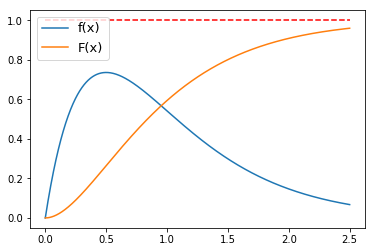

In [10]:
# Densidad de probabilidad
x = np.linspace(0, 2.5, 1000)
y = dens_func(x, 0, dist_params)
plt.plot(x[x>=0], y, label="f(x)")

# Distribucion de probabilidad
y = dist_func(x, 0, dist_params)
plt.plot(x[x>=0], y, label="F(x)")

plt.hlines(y=1.0, xmin=0, xmax=2.5, linestyles="--", color="r")
plt.legend(loc="best", fontsize=13)
plt.show()

# Condición de intersección
---

Las curvas $q(\pi, \kappa)$ y $h(\pi, \kappa)$ deberían intersectarse únicamente cuando:

$$q\left(\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}, 0\right) > 0$$

En esta parte, verificamos si la condición se cumple o no. Primero, definimos la función $y \ f(y)$ que va dentro de la integral:
$$\int_0^c y \ f(y) dy$$
A la función $y \ f(y)$ la llamamos `cond_func()`.

In [11]:
def cond_func(xx, y, param_dict):
    return xx*dens_func(xx, y, param_dict)

Una vez definida esta integral, podemos calcular el valor de $\pi$:
$$\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}$$

In [115]:
# Se calcula el valor numerico de pi segun lo especifica la condicion
x = np.linspace(0.0001, c)

# Calculamos el coeficiente que multiplica a los terminos dentro del corchete
con_coef = 1/(numerical_params["rho"]*numerical_params["eta"]*numerical_params["beta"]*numerical_params["sig"])

# Aplicamos la funcion RK4 para encontrar el valor de pi
pi_cond = con_coef*(RK4(cond_func, 0.001, c, 100, 0.3, dist_params) + c*(1-dist_func(c, y, dist_params)) - p)

Diferencia f(x+dx) - f(x):  -0.0001024788586442124


In [116]:
# Revisamos el valor de pi_cond

pi_cond

0.4443968931687866

Para la distribución gamma, obtuvimos un valor de `pi_cond` ($\pi_c$) igual a `LO QUE HAYA DADO`

Una vez calculado el valor $\pi_c$, podemos insertarlo en la función $q(\pi_c, 0)$. De esta manera, sabremos si las curvas de nivel se intersectan si 
$$q(\pi_c, 0) > 0$$

**Ahora:** La función $q(\pi, \kappa)$ es:
$$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{-\infty}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$

Por lo tanto, debemos comenzar definiendo la función `q_integ` de la forma: $$ \frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$
La cual va dentro del término integral de la función $q(\pi, \kappa)$

In [117]:
# Definimos el termino de la integral de la funcion q

def q_integ(zz, y, param_dict):
    num = param_dict["C"]*np.exp(-1*param_dict["M"]*zz)*(np.exp(zz)-1)
    den = np.float_power(1+(pi_cond * (np.exp(zz)-1) ), param_dict["eta"]) * np.float_power(abs(zz), 1+param_dict["alph"])
    return num/den

### Visualización de q_integ

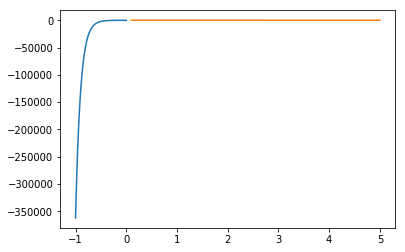

In [123]:
# AHORA: Visualizamos la funcion q_integ entre los limites definidios abajo:

# Limites de la integral para x<0
lim_inf = -5
lim_sup = -0.0001
# Limites de la integral para x>0
Lim_inf = 0.0001
Lim_sup = 5#0.053 #0.2878 # Weibull

x = np.linspace(0.2*lim_inf, lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))
#plt.show()

x = np.linspace(1000*Lim_inf, Lim_sup, 1000000)
plt.plot(x, q_integ(x, 0, numerical_params))

plt.show()

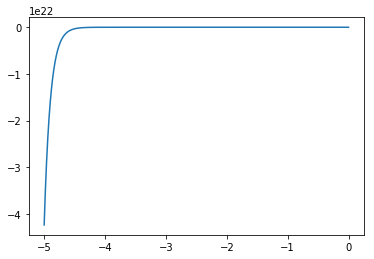

Diferencia f(x+dx) - f(x):  -54.58310917897313


In [126]:
# Nuevamente graficamos la funcion para mas valores de x

# Limites de la integral para x<0
lim_inf = -5.0
lim_sup = -0.0001
# Limites de la integral para x>0
Lim_inf = 0.0001
Lim_sup = 5.0 # 0.2878

x = np.linspace(lim_inf, lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))
plt.show()

RK1  = RK4(q_integ, lim_inf , lim_sup, 100000, 1e23, all_params)

Es claro que hay una discontinuidad en el cero, y más allá del 0.053, las soluciones son complejas. Sin embargo, como la función es continua a ambos lados del cero, podemos separa la integral para los términos menores a cero y los términos mayores a cero.

## Evaluación de la condición
---
Ya que $\pi_c>0$, definimos la función `q_func` como la función:
$$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$

Y evaluamos:

In [129]:
# Limites de la integral para x<0
lim_inf = -5
lim_sup = -0.0001
# Limites de la integral para x>0
Lim_inf = 0.0001
Lim_sup = 10 # EXPONENECIAL: 0.053 # 0.2878 

# Ahora definimos la funcion q

def q_func(pp, kk, param_dict):
    fix  = param_dict["mu"]-param_dict["eta"]*param_dict["sig"]*(param_dict["sig"]*pp - param_dict["rho"]*param_dict["beta"]*kk)
    
    # Evaluamos la integral sobre los reales positivos
    #RK1  = RK4(q_integ, lim_inf , lim_sup, 100000, 1e22, param_dict)
    #print("RK1: %.4f"%(RK1))
    
    print("-"*60)
    
    RK2  = RK4(q_integ, Lim_inf,  Lim_sup, 100000, 500, param_dict)
    print("RK2: %.4f"%(RK2))
    return fix + RK2 #+ RK1

In [130]:
# Calculamos el valor numerico de la funcion q segun la condicion

cond_test = q_func(pi_cond, 0, numerical_params)

------------------------------------------------------------
Diferencia f(x+dx) - f(x):  -2.043658638930322e-63
RK2: 2.4805


In [131]:
# Revisamos el valor numerico de la condicion a ver si da positivo o negativo

cond_test

2.370528739093413

# Resultado: condición
---
La condición $q(\pi_c, 0) = -1.636078 \cdot 10^{20}$. Es decir, nos da muy negativa. Por lo tanto, para los parámetros escogidos, las curvas de nivel no deberían intersectarse.

# Curvas de nivel
---
La condición:

$$q\left(\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}, 0\right) > 0$$

Es *suficiente*, mas no necesaria, para que las carvas de nivel $q(\pi, \kappa) = 0$ y $h(\pi, \kappa) = 0$ se intercepten. 

La función $q(\pi, \kappa)$ se define como: $$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$

La función $h(\pi, \kappa)$ se define como: $$h(\pi, \kappa) = p+\eta\beta\left[ \rho\sigma\pi-\beta\kappa \right] - \lambda\left\{\int_{0}^{c}\frac{y \ f(y)}{\left[1-\kappa y\right]^{\eta}} dy + \frac{c[1-F(c)]}{[1-\kappa c]^{\eta}}\right\} $$

---

## Tres casos de interés

 1. $\pi \geq 0$ y la función $q(\pi, \kappa)$ como se define arriba.
 2. $\pi \leq 1$ y la función $q(\pi, \kappa)$ integrada entre $(-\infty, 0]$
 3. $\pi \in [0, 1]$ y la función $q(\pi, \kappa)$ integrada entre $(-\infty, +\infty)$


 * Por lo tanto, para la primera ecuación, evaluaremos valores de $\pi$ y obtendremos el $\kappa$ dado por esta ecuación. Iterando sobre múltiples $\pi$, tendremos una curva de nivel donde la ecuación $q(\pi, \kappa)$ sea cero.
 
 * Para la segunda ecuación tendremos lo converso. Iterando valores de $\kappa$ obtendremos un conjunto de valores que harán que la función $h(\pi, \kappa)$ sea cero
 
Graficando los resultados obtenidos, veremos si las curvas llegan a intersectarse.
 
## Caso 1

 * $\pi \geq 0$

La función $q(\pi, \kappa)$ se hará cero cuando:

$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

Mientras tanto, $h(\pi, \kappa)$ se hará cero cuando:

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

# Primera curva de nivel
---
Comenzamos evaluando la función
$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{-\infty}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

Nuevamente, debemos comenzar definiendo la función que va dentro de la integral. En este caso es la función `kappa_int()` definida como:
$$\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}$$

Podemos ver que en su definición, el tercer argumento que acepta esta función (`pi_par`) será el valor de $\pi$ que pondremos a iterar para poder sacar la curva de nivel.

In [132]:
def kappa_int(xx, y, pi_par):
    num = (np.exp(xx)-1) * all_params["C"]*np.exp(-1*all_params["M"]*xx)*(np.exp(xx)-1)
    den = np.float_power(1+(pi_par*(np.exp(xx)-1)), eta) * np.float_power(abs(xx), 1+all_params["alph"])
    
    return num/den

### Visualización
Vemos cómo se ve la función `kappa_int()` para un valor de $\pi=0.21$ arbitrario

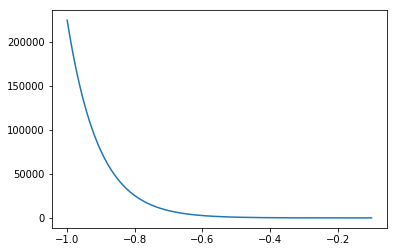

In [170]:
x = np.linspace(-1, -0.1, 2000)
y = kappa_int(x, 0.0, 0.44)
plt.plot(x, y)
plt.show()

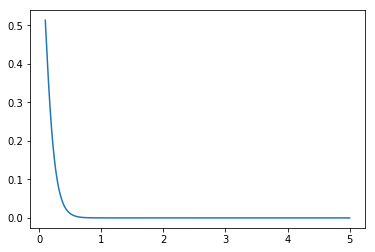

In [158]:
x = np.linspace(0.1, 5, 2000)
y = kappa_int(x, 0.0, 0.44)
plt.plot(x, y)
plt.show()

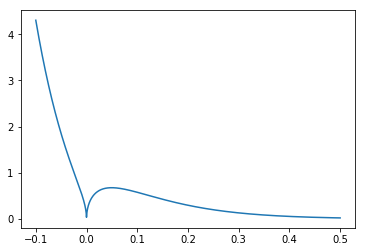

In [159]:
# Evaluamos como se ve cuando pasa por x=0

x = np.linspace(-0.1, 0.5, 2000)
y = kappa_int(x, 0.0, 0.21)
plt.plot(x, y)
plt.show()

In [141]:
# Integramos la funcion desde -50 hasta 0.1

erer = %time RK4(kappa_int, -50, 0.1, 10000, 1e216, 0.21)

Diferencia f(x+dx) - f(x):  -0.014108408928774407
CPU times: user 336 ms, sys: 0 ns, total: 336 ms
Wall time: 335 ms


**Ahora:** Podemos calcular finalmente las curvas de nivel. La función `kappa_level()` se define como:
$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{-\infty}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

In [186]:
#def kappa_level(zz, y, param_dict):
def kappa_level(a, b, N, param_dict):
    # Definimos los pi que vamos a iterar
    pi_it = np.linspace(a, b, N)
    
    coef = 1/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(N):
        '''RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i]) +''' 
        RKint = RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])
        corch = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint
        kapp.append(coef*corch)
    
    kapp = np.array(kapp)
    return pi_it, kapp

# Aplicación de los casos
---
## Caso 1:

In [187]:
# Limites de la integral para x<0
#lim_inf = -5.0
#lim_sup = -0.01
# Limites de la integral para x>0
Lim_inf = 0.01
Lim_sup = 10.0

x = np.linspace(-2.0, 2.0, 1000)
p_lvl1, k_lvl1 = kappa_level(0.0, 5.0, 2000, all_params)

Diferencia f(x+dx) - f(x):  -2.625800804108741e-37
Diferencia f(x+dx) - f(x):  -8.16031449548341e-46
Diferencia f(x+dx) - f(x):  -2.6778124515004155e-47
Diferencia f(x+dx) - f(x):  -3.5846210021838244e-48
Diferencia f(x+dx) - f(x):  -8.576651529850894e-49
Diferencia f(x+dx) - f(x):  -2.8243034443921304e-49
Diferencia f(x+dx) - f(x):  -1.1387683041592046e-49
Diferencia f(x+dx) - f(x):  -5.281090212129253e-50
Diferencia f(x+dx) - f(x):  -2.7135059643791937e-50
Diferencia f(x+dx) - f(x):  -1.5078732975045702e-50
Diferencia f(x+dx) - f(x):  -8.913635237909002e-51
Diferencia f(x+dx) - f(x):  -5.53964784231759e-51
Diferencia f(x+dx) - f(x):  -3.5881038911348615e-51
Diferencia f(x+dx) - f(x):  -2.406190846663822e-51
Diferencia f(x+dx) - f(x):  -1.6620454761710725e-51
Diferencia f(x+dx) - f(x):  -1.177691539403519e-51
Diferencia f(x+dx) - f(x):  -8.532319814869283e-52
Diferencia f(x+dx) - f(x):  -6.3034825004804126e-52
Diferencia f(x+dx) - f(x):  -4.738088767241522e-52
Diferencia f(x+dx) - f(x

Diferencia f(x+dx) - f(x):  -7.583589426805568e-57
Diferencia f(x+dx) - f(x):  -7.356579330736566e-57
Diferencia f(x+dx) - f(x):  -7.137675099115826e-57
Diferencia f(x+dx) - f(x):  -6.926541057465212e-57
Diferencia f(x+dx) - f(x):  -6.722857324232016e-57
Diferencia f(x+dx) - f(x):  -6.526318979775431e-57
Diferencia f(x+dx) - f(x):  -6.336635283656953e-57
Diferencia f(x+dx) - f(x):  -6.153528937162682e-57
Diferencia f(x+dx) - f(x):  -5.976735388199631e-57
Diferencia f(x+dx) - f(x):  -5.806002175902678e-57
Diferencia f(x+dx) - f(x):  -5.641088312470889e-57
Diferencia f(x+dx) - f(x):  -5.481763699920641e-57
Diferencia f(x+dx) - f(x):  -5.32780857959741e-57
Diferencia f(x+dx) - f(x):  -5.179013012434404e-57
Diferencia f(x+dx) - f(x):  -5.0351763880789546e-57
Diferencia f(x+dx) - f(x):  -4.8961069611330633e-57
Diferencia f(x+dx) - f(x):  -4.76162141286948e-57
Diferencia f(x+dx) - f(x):  -4.6315444368924137e-57
Diferencia f(x+dx) - f(x):  -4.5057083473119e-57
Diferencia f(x+dx) - f(x):  -4.3

Diferencia f(x+dx) - f(x):  -2.407055770556608e-58
Diferencia f(x+dx) - f(x):  -2.3705880946917183e-58
Diferencia f(x+dx) - f(x):  -2.334781410507442e-58
Diferencia f(x+dx) - f(x):  -2.2996217826052773e-58
Diferencia f(x+dx) - f(x):  -2.265095610341875e-58
Diferencia f(x+dx) - f(x):  -2.231189618809708e-58
Diferencia f(x+dx) - f(x):  -2.19789085008648e-58
Diferencia f(x+dx) - f(x):  -2.1651866547455138e-58
Diferencia f(x+dx) - f(x):  -2.1330646836174616e-58
Diferencia f(x+dx) - f(x):  -2.101512879796095e-58
Diferencia f(x+dx) - f(x):  -2.070519470879855e-58
Diferencia f(x+dx) - f(x):  -2.0400729614413583e-58
Diferencia f(x+dx) - f(x):  -2.0101621257180335e-58
Diferencia f(x+dx) - f(x):  -1.9807760005161375e-58
Diferencia f(x+dx) - f(x):  -1.9519038783218725e-58
Diferencia f(x+dx) - f(x):  -1.923535300612691e-58
Diferencia f(x+dx) - f(x):  -1.8956600513623617e-58
Diferencia f(x+dx) - f(x):  -1.868268150733806e-58
Diferencia f(x+dx) - f(x):  -1.841349848953753e-58
Diferencia f(x+dx) - f(

Diferencia f(x+dx) - f(x):  -3.252140103502705e-59
Diferencia f(x+dx) - f(x):  -3.219024200698869e-59
Diferencia f(x+dx) - f(x):  -3.1863121301760166e-59
Diferencia f(x+dx) - f(x):  -3.153998158301222e-59
Diferencia f(x+dx) - f(x):  -3.122076644289061e-59
Diferencia f(x+dx) - f(x):  -3.090542038513436e-59
Diferencia f(x+dx) - f(x):  -3.0593888808537716e-59
Diferencia f(x+dx) - f(x):  -3.02861179907415e-59
Diferencia f(x+dx) - f(x):  -2.998205507235129e-59
Diferencia f(x+dx) - f(x):  -2.9681648041373727e-59
Diferencia f(x+dx) - f(x):  -2.938484571796464e-59
Diferencia f(x+dx) - f(x):  -2.9091597739480937e-59
Diferencia f(x+dx) - f(x):  -2.8801854545829037e-59
Diferencia f(x+dx) - f(x):  -2.851556736510794e-59
Diferencia f(x+dx) - f(x):  -2.823268819953405e-59
Diferencia f(x+dx) - f(x):  -2.795316981164559e-59
Diferencia f(x+dx) - f(x):  -2.767696571077975e-59
Diferencia f(x+dx) - f(x):  -2.7404030139817647e-59
Diferencia f(x+dx) - f(x):  -2.7134318062187595e-59
Diferencia f(x+dx) - f(x)

Diferencia f(x+dx) - f(x):  -7.817479678489979e-60
Diferencia f(x+dx) - f(x):  -7.757531787266075e-60
Diferencia f(x+dx) - f(x):  -7.69813469917869e-60
Diferencia f(x+dx) - f(x):  -7.639282518996983e-60
Diferencia f(x+dx) - f(x):  -7.580969423490582e-60
Diferencia f(x+dx) - f(x):  -7.523189660441112e-60
Diferencia f(x+dx) - f(x):  -7.465937547670009e-60
Diferencia f(x+dx) - f(x):  -7.40920747208033e-60
Diferencia f(x+dx) - f(x):  -7.352993888713411e-60
Diferencia f(x+dx) - f(x):  -7.297291319819744e-60
Diferencia f(x+dx) - f(x):  -7.242094353943892e-60
Diferencia f(x+dx) - f(x):  -7.187397645023156e-60
Diferencia f(x+dx) - f(x):  -7.133195911500127e-60
Diferencia f(x+dx) - f(x):  -7.07948393544811e-60
Diferencia f(x+dx) - f(x):  -7.026256561710448e-60
Diferencia f(x+dx) - f(x):  -6.973508697051769e-60
Diferencia f(x+dx) - f(x):  -6.921235309322746e-60
Diferencia f(x+dx) - f(x):  -6.869431426637228e-60
Diferencia f(x+dx) - f(x):  -6.81809213656156e-60
Diferencia f(x+dx) - f(x):  -6.7672

Diferencia f(x+dx) - f(x):  -2.565660727109625e-60
Diferencia f(x+dx) - f(x):  -2.5499015719445496e-60
Diferencia f(x+dx) - f(x):  -2.5342584318679297e-60
Diferencia f(x+dx) - f(x):  -2.5187303116805545e-60
Diferencia f(x+dx) - f(x):  -2.5033162259277207e-60
Diferencia f(x+dx) - f(x):  -2.4880151987922115e-60
Diferencia f(x+dx) - f(x):  -2.472826263988317e-60
Diferencia f(x+dx) - f(x):  -2.4577484646572143e-60
Diferencia f(x+dx) - f(x):  -2.4427808532636664e-60
Diferencia f(x+dx) - f(x):  -2.4279224914939458e-60
Diferencia f(x+dx) - f(x):  -2.4131724501549326e-60
Diferencia f(x+dx) - f(x):  -2.398529809074586e-60
Diferencia f(x+dx) - f(x):  -2.3839936570034677e-60
Diferencia f(x+dx) - f(x):  -2.369563091517534e-60
Diferencia f(x+dx) - f(x):  -2.355237218922146e-60
Diferencia f(x+dx) - f(x):  -2.341015154157139e-60
Diferencia f(x+dx) - f(x):  -2.3268960207030705e-60
Diferencia f(x+dx) - f(x):  -2.3128789504886725e-60
Diferencia f(x+dx) - f(x):  -2.2989630837993068e-60
Diferencia f(x+dx)

Diferencia f(x+dx) - f(x):  -1.0482226239234995e-60
Diferencia f(x+dx) - f(x):  -1.0428361951356425e-60
Diferencia f(x+dx) - f(x):  -1.0374829468765821e-60
Diferencia f(x+dx) - f(x):  -1.032162640932651e-60
Diferencia f(x+dx) - f(x):  -1.0268750410427095e-60
Diferencia f(x+dx) - f(x):  -1.0216199128801686e-60
Diferencia f(x+dx) - f(x):  -1.016397024035147e-60
Diferencia f(x+dx) - f(x):  -1.0112061439969044e-60
Diferencia f(x+dx) - f(x):  -1.0060470441363752e-60
Diferencia f(x+dx) - f(x):  -1.0009194976888912e-60
Diferencia f(x+dx) - f(x):  -9.958232797371273e-61
Diferencia f(x+dx) - f(x):  -9.90758167194173e-61
Diferencia f(x+dx) - f(x):  -9.857239387867672e-61
Diferencia f(x+dx) - f(x):  -9.80720375038789e-61
Diferencia f(x+dx) - f(x):  -9.757472582547841e-61
Diferencia f(x+dx) - f(x):  -9.708043725037564e-61
Diferencia f(x+dx) - f(x):  -9.658915036031343e-61
Diferencia f(x+dx) - f(x):  -9.610084391027835e-61
Diferencia f(x+dx) - f(x):  -9.561549682693237e-61
Diferencia f(x+dx) - f(x)

Diferencia f(x+dx) - f(x):  -4.842687207170994e-61
Diferencia f(x+dx) - f(x):  -4.8213541892465735e-61
Diferencia f(x+dx) - f(x):  -4.800133843541607e-61
Diferencia f(x+dx) - f(x):  -4.779025476397235e-61
Diferencia f(x+dx) - f(x):  -4.7580283990307456e-61
Diferencia f(x+dx) - f(x):  -4.7371419274973134e-61
Diferencia f(x+dx) - f(x):  -4.7163653826514565e-61
Diferencia f(x+dx) - f(x):  -4.695698090109403e-61
Diferencia f(x+dx) - f(x):  -4.675139380211605e-61
Diferencia f(x+dx) - f(x):  -4.654688587985332e-61
Diferencia f(x+dx) - f(x):  -4.634345053107998e-61
Diferencia f(x+dx) - f(x):  -4.614108119870538e-61
Diferencia f(x+dx) - f(x):  -4.5939771371411e-61
Diferencia f(x+dx) - f(x):  -4.573951458329281e-61
Diferencia f(x+dx) - f(x):  -4.554030441350418e-61
Diferencia f(x+dx) - f(x):  -4.5342134485902735e-61
Diferencia f(x+dx) - f(x):  -4.5144998468702275e-61
Diferencia f(x+dx) - f(x):  -4.4948890074123316e-61
Diferencia f(x+dx) - f(x):  -4.475380305805156e-61
Diferencia f(x+dx) - f(x):

Diferencia f(x+dx) - f(x):  -2.481143786629116e-61
Diferencia f(x+dx) - f(x):  -2.4715790106126883e-61
Diferencia f(x+dx) - f(x):  -2.4620584469997143e-61
Diferencia f(x+dx) - f(x):  -2.4525818575442366e-61
Diferencia f(x+dx) - f(x):  -2.443149005466247e-61
Diferencia f(x+dx) - f(x):  -2.433759655441804e-61
Diferencia f(x+dx) - f(x):  -2.4244135735928284e-61
Diferencia f(x+dx) - f(x):  -2.4151105274771367e-61
Diferencia f(x+dx) - f(x):  -2.405850286078599e-61
Diferencia f(x+dx) - f(x):  -2.3966326197971575e-61
Diferencia f(x+dx) - f(x):  -2.3874573004392806e-61
Diferencia f(x+dx) - f(x):  -2.3783241012081e-61
Diferencia f(x+dx) - f(x):  -2.3692327966938326e-61
Diferencia f(x+dx) - f(x):  -2.360183162864325e-61
Diferencia f(x+dx) - f(x):  -2.3511749770554714e-61
Diferencia f(x+dx) - f(x):  -2.342208017961995e-61
Diferencia f(x+dx) - f(x):  -2.333282065627898e-61
Diferencia f(x+dx) - f(x):  -2.324396901437412e-61
Diferencia f(x+dx) - f(x):  -2.3155523081057078e-61
Diferencia f(x+dx) - f(

Diferencia f(x+dx) - f(x):  -1.3709741891563084e-61
Diferencia f(x+dx) - f(x):  -1.366279140249529e-61
Diferencia f(x+dx) - f(x):  -1.3616033725749622e-61
Diferencia f(x+dx) - f(x):  -1.3569467938161557e-61
Diferencia f(x+dx) - f(x):  -1.3523093121614888e-61
Diferencia f(x+dx) - f(x):  -1.3476908363010197e-61
Diferencia f(x+dx) - f(x):  -1.3430912754234156e-61
Diferencia f(x+dx) - f(x):  -1.338510539212922e-61
Diferencia f(x+dx) - f(x):  -1.3339485378462503e-61
Diferencia f(x+dx) - f(x):  -1.3294051819896378e-61
Diferencia f(x+dx) - f(x):  -1.324880382795835e-61
Diferencia f(x+dx) - f(x):  -1.3203740519010505e-61
Diferencia f(x+dx) - f(x):  -1.3158861014220966e-61
Diferencia f(x+dx) - f(x):  -1.3114164439533892e-61
Diferencia f(x+dx) - f(x):  -1.3069649925640433e-61
Diferencia f(x+dx) - f(x):  -1.3025316607949877e-61
Diferencia f(x+dx) - f(x):  -1.2981163626560495e-61
Diferencia f(x+dx) - f(x):  -1.2937190126231453e-61
Diferencia f(x+dx) - f(x):  -1.2893395256354051e-61
Diferencia f(x+

Diferencia f(x+dx) - f(x):  -8.067796556665176e-62
Diferencia f(x+dx) - f(x):  -8.042942299568928e-62
Diferencia f(x+dx) - f(x):  -8.018179867343048e-62
Diferencia f(x+dx) - f(x):  -7.993508864439564e-62
Diferencia f(x+dx) - f(x):  -7.968928897256531e-62
Diferencia f(x+dx) - f(x):  -7.944439574127126e-62
Diferencia f(x+dx) - f(x):  -7.920040505309537e-62
Diferencia f(x+dx) - f(x):  -7.895731302975683e-62
Diferencia f(x+dx) - f(x):  -7.871511581200878e-62
Diferencia f(x+dx) - f(x):  -7.847380955953547e-62
Diferencia f(x+dx) - f(x):  -7.823339045084413e-62
Diferencia f(x+dx) - f(x):  -7.799385468316423e-62
Diferencia f(x+dx) - f(x):  -7.775519847234296e-62
Diferencia f(x+dx) - f(x):  -7.751741805274249e-62
Diferencia f(x+dx) - f(x):  -7.72805096771402e-62
Diferencia f(x+dx) - f(x):  -7.70444696166227e-62
Diferencia f(x+dx) - f(x):  -7.680929416049228e-62
Diferencia f(x+dx) - f(x):  -7.657497961616004e-62
Diferencia f(x+dx) - f(x):  -7.634152230905101e-62
Diferencia f(x+dx) - f(x):  -7.61

Diferencia f(x+dx) - f(x):  -4.939804168460072e-62
Diferencia f(x+dx) - f(x):  -4.926005994272198e-62
Diferencia f(x+dx) - f(x):  -4.912254044577993e-62
Diferencia f(x+dx) - f(x):  -4.898548138815217e-62
Diferencia f(x+dx) - f(x):  -4.884888097227182e-62
Diferencia f(x+dx) - f(x):  -4.871273740858831e-62
Diferencia f(x+dx) - f(x):  -4.8577048915526445e-62
Diferencia f(x+dx) - f(x):  -4.844181371944673e-62
Diferencia f(x+dx) - f(x):  -4.830703005460575e-62
Diferencia f(x+dx) - f(x):  -4.8172696163116005e-62
Diferencia f(x+dx) - f(x):  -4.803881029490728e-62
Diferencia f(x+dx) - f(x):  -4.790537070768784e-62
Diferencia f(x+dx) - f(x):  -4.777237566690437e-62
Diferencia f(x+dx) - f(x):  -4.763982344570454e-62
Diferencia f(x+dx) - f(x):  -4.750771232489793e-62
Diferencia f(x+dx) - f(x):  -4.737604059291735e-62
Diferencia f(x+dx) - f(x):  -4.724480654578247e-62
Diferencia f(x+dx) - f(x):  -4.711400848706045e-62
Diferencia f(x+dx) - f(x):  -4.698364472782845e-62
Diferencia f(x+dx) - f(x):  -

Diferencia f(x+dx) - f(x):  -3.168278326222409e-62
Diferencia f(x+dx) - f(x):  -3.1601795415870787e-62
Diferencia f(x+dx) - f(x):  -3.1521055868882812e-62
Diferencia f(x+dx) - f(x):  -3.144056373358077e-62
Diferencia f(x+dx) - f(x):  -3.136031812590959e-62
Diferencia f(x+dx) - f(x):  -3.128031816542325e-62
Diferencia f(x+dx) - f(x):  -3.1200562975267033e-62
Diferencia f(x+dx) - f(x):  -3.1121051682161934e-62
Diferencia f(x+dx) - f(x):  -3.1041783416387574e-62
Diferencia f(x+dx) - f(x):  -3.096275731176644e-62
Diferencia f(x+dx) - f(x):  -3.088397250564699e-62
Diferencia f(x+dx) - f(x):  -3.0805428138887977e-62
Diferencia f(x+dx) - f(x):  -3.0727123355843144e-62
Diferencia f(x+dx) - f(x):  -3.0649057304343497e-62
Diferencia f(x+dx) - f(x):  -3.057122913568256e-62
Diferencia f(x+dx) - f(x):  -3.0493638004600727e-62
Diferencia f(x+dx) - f(x):  -3.0416283069268363e-62
Diferencia f(x+dx) - f(x):  -3.0339163491271922e-62
Diferencia f(x+dx) - f(x):  -3.0262278435596884e-62
Diferencia f(x+dx) 

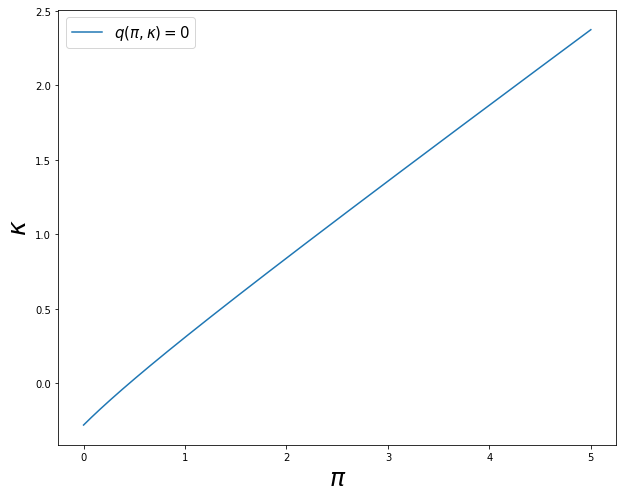

In [188]:
plt.figure(figsize=(10, 8))
plt.plot(p_lvl1, k_lvl1, label=r"$q(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

## Caso 2
---
$\pi \leq 1$

In [189]:
def kappa_level(a, b, N, param_dict):
    # Definimos los pi que vamos a iterar
    pi_it = np.linspace(a, b, N)
    
    coef = 1/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(N):
        RKint = RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i])
        '''RKint = RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])'''
        corch = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint
        kapp.append(coef*corch)
    
    kapp = np.array(kapp)
    return pi_it, kapp

In [190]:
# Limites de la integral para x<0
lim_inf = -10.0
lim_sup = -0.01
# Limites de la integral para x>0
#Lim_inf = 0.01
#Lim_sup = 1.0

x = np.linspace(-2.0, 2.0, 1000)
p_lvl2, k_lvl2 = kappa_level(-2.0, 5.0, 2000, all_params)

Diferencia f(x+dx) - f(x):  -0.15409756364810334
Diferencia f(x+dx) - f(x):  -0.154280879837553
Diferencia f(x+dx) - f(x):  -0.1544643467163873
Diferencia f(x+dx) - f(x):  -0.15464796440785344
Diferencia f(x+dx) - f(x):  -0.1548317330353023
Diferencia f(x+dx) - f(x):  -0.15501565272219575
Diferencia f(x+dx) - f(x):  -0.15519972359209977
Diferencia f(x+dx) - f(x):  -0.15538394576868853
Diferencia f(x+dx) - f(x):  -0.15556831937574578
Diferencia f(x+dx) - f(x):  -0.1557528445371592
Diferencia f(x+dx) - f(x):  -0.15593752137692884
Diferencia f(x+dx) - f(x):  -0.1561223500191582
Diferencia f(x+dx) - f(x):  -0.15630733058806034
Diferencia f(x+dx) - f(x):  -0.15649246320795784
Diferencia f(x+dx) - f(x):  -0.1566777480032785
Diferencia f(x+dx) - f(x):  -0.15686318509856167
Diferencia f(x+dx) - f(x):  -0.15704877461845235
Diferencia f(x+dx) - f(x):  -0.15723451668770405
Diferencia f(x+dx) - f(x):  -0.15742041143118135
Diferencia f(x+dx) - f(x):  -0.15760645897385417
Diferencia f(x+dx) - f(x): 

Diferencia f(x+dx) - f(x):  -0.18752882544880856
Diferencia f(x+dx) - f(x):  -0.18773961892131452
Diferencia f(x+dx) - f(x):  -0.18795058565818945
Diferencia f(x+dx) - f(x):  -0.18816172580242252
Diferencia f(x+dx) - f(x):  -0.18837303949712558
Diferencia f(x+dx) - f(x):  -0.18858452688553728
Diferencia f(x+dx) - f(x):  -0.18879618811102494
Diferencia f(x+dx) - f(x):  -0.18900802331707744
Diferencia f(x+dx) - f(x):  -0.18922003264731468
Diferencia f(x+dx) - f(x):  -0.18943221624547957
Diferencia f(x+dx) - f(x):  -0.1896445742554419
Diferencia f(x+dx) - f(x):  -0.1898571068212006
Diferencia f(x+dx) - f(x):  -0.19006981408687784
Diferencia f(x+dx) - f(x):  -0.19028269619672644
Diferencia f(x+dx) - f(x):  -0.19049575329512292
Diferencia f(x+dx) - f(x):  -0.19070898552657167
Diferencia f(x+dx) - f(x):  -0.19092239303570657
Diferencia f(x+dx) - f(x):  -0.1911359759672847
Diferencia f(x+dx) - f(x):  -0.1913497344661963
Diferencia f(x+dx) - f(x):  -0.19156366867745456
Diferencia f(x+dx) - f(x

Diferencia f(x+dx) - f(x):  -0.22597204581866615
Diferencia f(x+dx) - f(x):  -0.22621445361465808
Diferencia f(x+dx) - f(x):  -0.22645706089073847
Diferencia f(x+dx) - f(x):  -0.22669986781310936
Diferencia f(x+dx) - f(x):  -0.22694287454811757
Diferencia f(x+dx) - f(x):  -0.2271860812622587
Diferencia f(x+dx) - f(x):  -0.22742948812217878
Diferencia f(x+dx) - f(x):  -0.22767309529466884
Diferencia f(x+dx) - f(x):  -0.22791690294667355
Diferencia f(x+dx) - f(x):  -0.22816091124528182
Diferencia f(x+dx) - f(x):  -0.2284051203577322
Diferencia f(x+dx) - f(x):  -0.22864953045141512
Diferencia f(x+dx) - f(x):  -0.22889414169386646
Diferencia f(x+dx) - f(x):  -0.2291389542527753
Diferencia f(x+dx) - f(x):  -0.22938396829597696
Diferencia f(x+dx) - f(x):  -0.22962918399145738
Diferencia f(x+dx) - f(x):  -0.22987460150735428
Diferencia f(x+dx) - f(x):  -0.2301202210119523
Diferencia f(x+dx) - f(x):  -0.23036604267368854
Diferencia f(x+dx) - f(x):  -0.23061206666114964
Diferencia f(x+dx) - f(x

Diferencia f(x+dx) - f(x):  -0.27130244262265835
Diferencia f(x+dx) - f(x):  -0.2715821946840933
Diferencia f(x+dx) - f(x):  -0.2718621775024067
Diferencia f(x+dx) - f(x):  -0.272142391271853
Diferencia f(x+dx) - f(x):  -0.27242283618686336
Diferencia f(x+dx) - f(x):  -0.2727035124420468
Diferencia f(x+dx) - f(x):  -0.27298442023218383
Diferencia f(x+dx) - f(x):  -0.27326555975223543
Diferencia f(x+dx) - f(x):  -0.27354693119733553
Diferencia f(x+dx) - f(x):  -0.27382853476279356
Diferencia f(x+dx) - f(x):  -0.27411037064410004
Diferencia f(x+dx) - f(x):  -0.27439243903691624
Diferencia f(x+dx) - f(x):  -0.2746747401370858
Diferencia f(x+dx) - f(x):  -0.27495727414062565
Diferencia f(x+dx) - f(x):  -0.2752400412437289
Diferencia f(x+dx) - f(x):  -0.2755230416427713
Diferencia f(x+dx) - f(x):  -0.2758062755342988
Diferencia f(x+dx) - f(x):  -0.27608974311504275
Diferencia f(x+dx) - f(x):  -0.27637344458190627
Diferencia f(x+dx) - f(x):  -0.27665738013197194
Diferencia f(x+dx) - f(x):  -

Diferencia f(x+dx) - f(x):  -0.32201581950805624
Diferencia f(x+dx) - f(x):  -0.3223374716005575
Diferencia f(x+dx) - f(x):  -0.3226593899114728
Diferencia f(x+dx) - f(x):  -0.3229815746672977
Diferencia f(x+dx) - f(x):  -0.32330402609473374
Diferencia f(x+dx) - f(x):  -0.32362674442068884
Diferencia f(x+dx) - f(x):  -0.3239497298722802
Diferencia f(x+dx) - f(x):  -0.324272982676833
Diferencia f(x+dx) - f(x):  -0.3245965030618797
Diferencia f(x+dx) - f(x):  -0.324920291255162
Diferencia f(x+dx) - f(x):  -0.32524434748462805
Diferencia f(x+dx) - f(x):  -0.325568671978437
Diferencia f(x+dx) - f(x):  -0.32589326496495574
Diferencia f(x+dx) - f(x):  -0.32621812667276084
Diferencia f(x+dx) - f(x):  -0.3265432573306384
Diferencia f(x+dx) - f(x):  -0.32686865716758284
Diferencia f(x+dx) - f(x):  -0.3271943264127992
Diferencia f(x+dx) - f(x):  -0.3275202652957031
Diferencia f(x+dx) - f(x):  -0.32784647404591893
Diferencia f(x+dx) - f(x):  -0.3281729528932832
Diferencia f(x+dx) - f(x):  -0.3284

Diferencia f(x+dx) - f(x):  -0.38293694606498596
Diferencia f(x+dx) - f(x):  -0.3833091340237139
Diferencia f(x+dx) - f(x):  -0.38368163144914047
Diferencia f(x+dx) - f(x):  -0.38405443860762667
Diferencia f(x+dx) - f(x):  -0.38442755576578214
Diferencia f(x+dx) - f(x):  -0.38480098319046485
Diferencia f(x+dx) - f(x):  -0.3851747211487788
Diferencia f(x+dx) - f(x):  -0.3855487699080785
Diferencia f(x+dx) - f(x):  -0.3859231297359631
Diferencia f(x+dx) - f(x):  -0.3862978009002841
Diferencia f(x+dx) - f(x):  -0.3866727836691396
Diferencia f(x+dx) - f(x):  -0.3870480783108773
Diferencia f(x+dx) - f(x):  -0.38742368509409486
Diferencia f(x+dx) - f(x):  -0.3877996042876375
Diferencia f(x+dx) - f(x):  -0.3881758361606017
Diferencia f(x+dx) - f(x):  -0.38855238098233436
Diferencia f(x+dx) - f(x):  -0.3889292390224319
Diferencia f(x+dx) - f(x):  -0.3893064105507429
Diferencia f(x+dx) - f(x):  -0.3896838958373625
Diferencia f(x+dx) - f(x):  -0.3900616951526421
Diferencia f(x+dx) - f(x):  -0.39

Diferencia f(x+dx) - f(x):  -0.45259473080741863
Diferencia f(x+dx) - f(x):  -0.45302499796700224
Diferencia f(x+dx) - f(x):  -0.4534556248887136
Diferencia f(x+dx) - f(x):  -0.4538866118859576
Diferencia f(x+dx) - f(x):  -0.45431795927243634
Diferencia f(x+dx) - f(x):  -0.4547496673621467
Diferencia f(x+dx) - f(x):  -0.4551817364693814
Diferencia f(x+dx) - f(x):  -0.45561416690873024
Diferencia f(x+dx) - f(x):  -0.4560469589950773
Diferencia f(x+dx) - f(x):  -0.4564801130436057
Diferencia f(x+dx) - f(x):  -0.45691362936979407
Diferencia f(x+dx) - f(x):  -0.45734750828942006
Diferencia f(x+dx) - f(x):  -0.4577817501185584
Diferencia f(x+dx) - f(x):  -0.4582163551735803
Diferencia f(x+dx) - f(x):  -0.4586513237711567
Diferencia f(x+dx) - f(x):  -0.4590866562282576
Diferencia f(x+dx) - f(x):  -0.45952235286215104
Diferencia f(x+dx) - f(x):  -0.4599584139904058
Diferencia f(x+dx) - f(x):  -0.4603948399308868
Diferencia f(x+dx) - f(x):  -0.4608316310017615
Diferencia f(x+dx) - f(x):  -0.46

Diferencia f(x+dx) - f(x):  -0.5326602968676328
Diferencia f(x+dx) - f(x):  -0.5331577275006176
Diferencia f(x+dx) - f(x):  -0.5336555767781772
Diferencia f(x+dx) - f(x):  -0.5341538450696179
Diferencia f(x+dx) - f(x):  -0.5346525327446012
Diferencia f(x+dx) - f(x):  -0.5351516401731413
Diferencia f(x+dx) - f(x):  -0.5356511677256066
Diferencia f(x+dx) - f(x):  -0.5361511157727215
Diferencia f(x+dx) - f(x):  -0.5366514846855617
Diferencia f(x+dx) - f(x):  -0.5371522748355595
Diferencia f(x+dx) - f(x):  -0.537653486594504
Diferencia f(x+dx) - f(x):  -0.5381551203345383
Diferencia f(x+dx) - f(x):  -0.5386571764281638
Diferencia f(x+dx) - f(x):  -0.5391596552482345
Diferencia f(x+dx) - f(x):  -0.5396625571679656
Diferencia f(x+dx) - f(x):  -0.540165882560927
Diferencia f(x+dx) - f(x):  -0.5406696318010475
Diferencia f(x+dx) - f(x):  -0.5411738052626147
Diferencia f(x+dx) - f(x):  -0.5416784033202715
Diferencia f(x+dx) - f(x):  -0.5421834263490224
Diferencia f(x+dx) - f(x):  -0.54268887472

Diferencia f(x+dx) - f(x):  -0.6252707753374969
Diferencia f(x+dx) - f(x):  -0.6258464394206351
Diferencia f(x+dx) - f(x):  -0.6264225916226027
Diferencia f(x+dx) - f(x):  -0.626999232379682
Diferencia f(x+dx) - f(x):  -0.6275763621285806
Diferencia f(x+dx) - f(x):  -0.6281539813064276
Diferencia f(x+dx) - f(x):  -0.6287320903507794
Diferencia f(x+dx) - f(x):  -0.6293106896996179
Diferencia f(x+dx) - f(x):  -0.6298897797913461
Diferencia f(x+dx) - f(x):  -0.6304693610648009
Diferencia f(x+dx) - f(x):  -0.6310494339592376
Diferencia f(x+dx) - f(x):  -0.6316299989143437
Diferencia f(x+dx) - f(x):  -0.632211056370233
Diferencia f(x+dx) - f(x):  -0.6327926067674439
Diferencia f(x+dx) - f(x):  -0.63337465054695
Diferencia f(x+dx) - f(x):  -0.6339571881501471
Diferencia f(x+dx) - f(x):  -0.6345402200188628
Diferencia f(x+dx) - f(x):  -0.6351237465953563
Diferencia f(x+dx) - f(x):  -0.6357077683223116
Diferencia f(x+dx) - f(x):  -0.6362922856428506
Diferencia f(x+dx) - f(x):  -0.6368772990005

Diferencia f(x+dx) - f(x):  -0.7311764804805854
Diferencia f(x+dx) - f(x):  -0.7318423173834347
Diferencia f(x+dx) - f(x):  -0.732508723557121
Diferencia f(x+dx) - f(x):  -0.7331756995173981
Diferencia f(x+dx) - f(x):  -0.7338432457805288
Diferencia f(x+dx) - f(x):  -0.7345113628632849
Diferencia f(x+dx) - f(x):  -0.7351800512829483
Diferencia f(x+dx) - f(x):  -0.7358493115573099
Diferencia f(x+dx) - f(x):  -0.7365191442046748
Diferencia f(x+dx) - f(x):  -0.7371895497438581
Diferencia f(x+dx) - f(x):  -0.7378605286941873
Diferencia f(x+dx) - f(x):  -0.7385320815755041
Diferencia f(x+dx) - f(x):  -0.739204208908161
Diferencia f(x+dx) - f(x):  -0.739876911213027
Diferencia f(x+dx) - f(x):  -0.7405501890114845
Diferencia f(x+dx) - f(x):  -0.7412240428254311
Diferencia f(x+dx) - f(x):  -0.741898473177282
Diferencia f(x+dx) - f(x):  -0.7425734805899635
Diferencia f(x+dx) - f(x):  -0.7432490655869235
Diferencia f(x+dx) - f(x):  -0.7439252286921259
Diferencia f(x+dx) - f(x):  -0.7446019704300

Diferencia f(x+dx) - f(x):  -0.8537494018057135
Diferencia f(x+dx) - f(x):  -0.8545205169705821
Diferencia f(x+dx) - f(x):  -0.8552922974724488
Diferencia f(x+dx) - f(x):  -0.8560647439226701
Diferencia f(x+dx) - f(x):  -0.8568378569332109
Diferencia f(x+dx) - f(x):  -0.8576116371166551
Diferencia f(x+dx) - f(x):  -0.8583860850861991
Diferencia f(x+dx) - f(x):  -0.8591612014556549
Diferencia f(x+dx) - f(x):  -0.8599369868394506
Diferencia f(x+dx) - f(x):  -0.8607134418526305
Diferencia f(x+dx) - f(x):  -0.8614905671108555
Diferencia f(x+dx) - f(x):  -0.8622683632304078
Diferencia f(x+dx) - f(x):  -0.863046830828184
Diferencia f(x+dx) - f(x):  -0.8638259705217046
Diferencia f(x+dx) - f(x):  -0.864605782929105
Diferencia f(x+dx) - f(x):  -0.8653862686691463
Diferencia f(x+dx) - f(x):  -0.8661674283612069
Diferencia f(x+dx) - f(x):  -0.8669492626252908
Diferencia f(x+dx) - f(x):  -0.8677317720820241
Diferencia f(x+dx) - f(x):  -0.868514957352654
Diferencia f(x+dx) - f(x):  -0.869298819059

Diferencia f(x+dx) - f(x):  -1.0029795058250275
Diferencia f(x+dx) - f(x):  -1.0038800613830359
Diferencia f(x+dx) - f(x):  -1.004781402150315
Diferencia f(x+dx) - f(x):  -1.0056835288595534
Diferencia f(x+dx) - f(x):  -1.006586442244199
Diferencia f(x+dx) - f(x):  -1.0074901430384384
Diferencia f(x+dx) - f(x):  -1.0083946319772124
Diferencia f(x+dx) - f(x):  -1.0092999097962148
Diferencia f(x+dx) - f(x):  -1.0102059772318823
Diferencia f(x+dx) - f(x):  -1.0111128350214151
Diferencia f(x+dx) - f(x):  -1.012020483902757
Diferencia f(x+dx) - f(x):  -1.012928924614612
Diferencia f(x+dx) - f(x):  -1.013838157896437
Diferencia f(x+dx) - f(x):  -1.0147481844884403
Diferencia f(x+dx) - f(x):  -1.0156590051315963
Diferencia f(x+dx) - f(x):  -1.016570620567627
Diferencia f(x+dx) - f(x):  -1.0174830315390178
Diferencia f(x+dx) - f(x):  -1.0183962387890138
Diferencia f(x+dx) - f(x):  -1.0193102430616134
Diferencia f(x+dx) - f(x):  -1.0202250451015873
Diferencia f(x+dx) - f(x):  -1.021140645654457

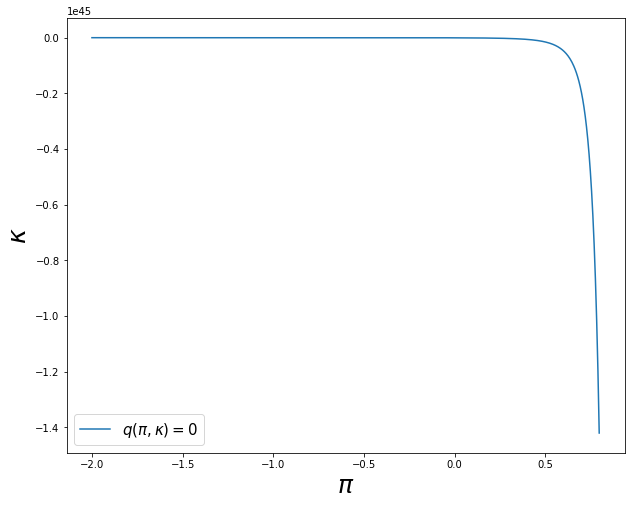

In [191]:
plt.figure(figsize=(10, 8))
plt.plot(p_lvl[0:800], k_lvl[0:800], label=r"$q(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

## Caso 3
---
$\pi \in [0, 1]$

In [192]:
def kappa_level(a, b, N, param_dict):
    # Definimos los pi que vamos a iterar
    print(lim_inf, "--"*5, Lim_inf)
    pi_it = np.linspace(a, b, N)
    
    coef = 1/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(N):
        RKint = RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i])
        RKint2 = RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])
        corch = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint - RKint2
        kapp.append(coef*corch)
        print("RK1: %.4f \nRK2: %.4f"%(RKint, RKint2))
    
    kapp = np.array(kapp)
    return pi_it, kapp

In [211]:
# Limites de la integral para x<0
lim_inf = -10.0
lim_sup = -0.01
# Limites de la integral para x>0
Lim_inf = 0.01
Lim_sup = 10.0

p_lvl3, k_lvl3 = kappa_level(0.0, 1.0, 2000, all_params)

-10.0 ---------- 0.01
Diferencia f(x+dx) - f(x):  -0.28766422586540064
Diferencia f(x+dx) - f(x):  -2.625800804108741e-37
RK1: 431525698136545292374774589560355813326848.0000 
RK2: 0.1616
Diferencia f(x+dx) - f(x):  -0.287706104621233
Diferencia f(x+dx) - f(x):  -1.7524947279701988e-42
RK1: 432606619086696397705829109439305445539840.0000 
RK2: 0.1615
Diferencia f(x+dx) - f(x):  -0.287747988315199
Diferencia f(x+dx) - f(x):  -6.90111839113383e-44
RK1: 433690790760416708573222859396143642574848.0000 
RK2: 0.1614
Diferencia f(x+dx) - f(x):  -0.2877898769478936
Diferencia f(x+dx) - f(x):  -9.839264431641661e-45
RK1: 434778224568890965957440806560956317433856.0000 
RK2: 0.1614
Diferencia f(x+dx) - f(x):  -0.28783177051991327
Diferencia f(x+dx) - f(x):  -2.4306384920022718e-45
RK1: 435868931969101734706087927342524027371520.0000 
RK2: 0.1613
Diferencia f(x+dx) - f(x):  -0.2878736690318525
Diferencia f(x+dx) - f(x):  -8.16031449548341e-46
RK1: 436962924464045269328239595613757508681728.0000 


Diferencia f(x+dx) - f(x):  -8.074920726821798e-51
RK1: 491046928598912319313640875476275414695936.0000 
RK2: 0.1576
Diferencia f(x+dx) - f(x):  -0.28984848231905824
Diferencia f(x+dx) - f(x):  -7.329147465413204e-51
RK1: 492309193809831702425746729910282074718208.0000 
RK2: 0.1575
Diferencia f(x+dx) - f(x):  -0.2898906186494138
Diferencia f(x+dx) - f(x):  -6.664518921792262e-51
RK1: 493575354696194607156160794396503215964160.0000 
RK2: 0.1575
Diferencia f(x+dx) - f(x):  -0.2899327599489817
Diferencia f(x+dx) - f(x):  -6.070919078395744e-51
RK1: 494845425292120286095324176700937078833152.0000 
RK2: 0.1574
Diferencia f(x+dx) - f(x):  -0.28997490621836064
Diferencia f(x+dx) - f(x):  -5.53964784231759e-51
RK1: 496119419689537006303216851321752481955840.0000 
RK2: 0.1573
Diferencia f(x+dx) - f(x):  -0.2900170574581511
Diferencia f(x+dx) - f(x):  -5.063201942560916e-51
RK1: 497397352038449521729095756964934214221824.0000 
RK2: 0.1572
Diferencia f(x+dx) - f(x):  -0.2900592136689517
Diferenci

RK2: 0.1538
Diferencia f(x+dx) - f(x):  -0.2920461739471586
Diferencia f(x+dx) - f(x):  -2.30128678206865e-52
RK1: 563661719155211473986496714582312594964480.0000 
RK2: 0.1537
Diferencia f(x+dx) - f(x):  -0.29208856947347117
Diferencia f(x+dx) - f(x):  -2.1938687477114747e-52
RK1: 565151231076920938189030237300767171018752.0000 
RK2: 0.1536
Diferencia f(x+dx) - f(x):  -0.292130970000284
Diferencia f(x+dx) - f(x):  -2.092411684057375e-52
RK1: 566645468851783230485676666721483846844416.0000 
RK2: 0.1536
Diferencia f(x+dx) - f(x):  -0.2921733755282012
Diferencia f(x+dx) - f(x):  -1.9965332128919275e-52
RK1: 568144449982009718374968164191044624187392.0000 
RK2: 0.1535
Diferencia f(x+dx) - f(x):  -0.2922157860578266
Diferencia f(x+dx) - f(x):  -1.9058787331468195e-52
RK1: 569648192043930798585065553582532407066624.0000 
RK2: 0.1534
Diferencia f(x+dx) - f(x):  -0.29225820158976323
Diferencia f(x+dx) - f(x):  -1.8201191713422427e-52
RK1: 571156712688348168386187467320006983811072.0000 
RK2: 0

Diferencia f(x+dx) - f(x):  -3.2374676304867747e-53
RK1: 644287377653225500874577439413998289158144.0000 
RK2: 0.1502
Diferencia f(x+dx) - f(x):  -0.2942147340202216
Diferencia f(x+dx) - f(x):  -3.1344371208632343e-53
RK1: 646036160679066162852477801617458106204160.0000 
RK2: 0.1502
Diferencia f(x+dx) - f(x):  -0.2942573853434961
Diferencia f(x+dx) - f(x):  -3.035316336528154e-53
RK1: 647790642844085681960447295678135316512768.0000 
RK2: 0.1501
Diferencia f(x+dx) - f(x):  -0.2943000416981634
Diferencia f(x+dx) - f(x):  -2.9399332770064797e-53
RK1: 649550845828584916132754847647701204467712.0000 
RK2: 0.1500
Diferencia f(x+dx) - f(x):  -0.2943427030848321
Diferencia f(x+dx) - f(x):  -2.848124535489277e-53
RK1: 651316791407172465550226304308718780547072.0000 
RK2: 0.1499
Diferencia f(x+dx) - f(x):  -0.29438536950410854
Diferencia f(x+dx) - f(x):  -2.7597348188015603e-53
RK1: 653088501449226733759907701362248879439872.0000 
RK2: 0.1499
Diferencia f(x+dx) - f(x):  -0.29442804095660213
Dife

RK1: 743287073142311162121547610436777784901632.0000 
RK2: 0.1468
Diferencia f(x+dx) - f(x):  -0.29643928791071683
Diferencia f(x+dx) - f(x):  -7.384397410227159e-54
RK1: 745363175558919758730855028726811697610752.0000 
RK2: 0.1467
Diferencia f(x+dx) - f(x):  -0.2964822016740808
Diferencia f(x+dx) - f(x):  -7.208669452667359e-54
RK1: 747446240469713764932462389886494762336256.0000 
RK2: 0.1466
Diferencia f(x+dx) - f(x):  -0.2965251205005467
Diferencia f(x+dx) - f(x):  -7.037935886394313e-54
RK1: 749536295131217961225441008664758041182208.0000 
RK2: 0.1466
Diferencia f(x+dx) - f(x):  -0.29656804439072704
Diferencia f(x+dx) - f(x):  -6.872031889284711e-54
RK1: 751633366921970510033393118447536990846976.0000 
RK2: 0.1465
Diferencia f(x+dx) - f(x):  -0.296610973345233
Diferencia f(x+dx) - f(x):  -6.710798826420703e-54
RK1: 753737483343138057161471794581861964972032.0000 
RK2: 0.1464
Diferencia f(x+dx) - f(x):  -0.29665390736467756
Diferencia f(x+dx) - f(x):  -6.554083990020266e-54
RK1: 755

Diferencia f(x+dx) - f(x):  -2.409221316208727e-54
RK1: 863590905211971918958042589507692047368192.0000 
RK2: 0.1434
Diferencia f(x+dx) - f(x):  -0.29872070868134715
Diferencia f(x+dx) - f(x):  -2.3632625535542152e-54
RK1: 866076628047652248563989570558767709290496.0000 
RK2: 0.1433
Diferencia f(x+dx) - f(x):  -0.2987638916341816
Diferencia f(x+dx) - f(x):  -2.318351848927867e-54
RK1: 868570941584757211058171631248802618277888.0000 
RK2: 0.1433
Diferencia f(x+dx) - f(x):  -0.29880707968265874
Diferencia f(x+dx) - f(x):  -2.2744614244212106e-54
RK1: 871073880481130432051646158971499276402688.0000 
RK2: 0.1432
Diferencia f(x+dx) - f(x):  -0.2988502728273935
Diferencia f(x+dx) - f(x):  -2.2315643403542142e-54
RK1: 873585479554496266941701956986453891219456.0000 
RK2: 0.1432
Diferencia f(x+dx) - f(x):  -0.298893471069004
Diferencia f(x+dx) - f(x):  -2.1896344669261008e-54
RK1: 876105773783311503658887586048286973231104.0000 
RK2: 0.1431
Diferencia f(x+dx) - f(x):  -0.2989366744081048
Difer

Diferencia f(x+dx) - f(x):  -0.3009295490705852
Diferencia f(x+dx) - f(x):  -9.654115980864517e-55
RK1: 1005051246568737476626785638380883746488320.0000 
RK2: 0.1403
Diferencia f(x+dx) - f(x):  -0.30097299268839917
Diferencia f(x+dx) - f(x):  -9.500439684821453e-55
RK1: 1008033413599132191803091822274691532324864.0000 
RK2: 0.1402
Diferencia f(x+dx) - f(x):  -0.3010164414333807
Diferencia f(x+dx) - f(x):  -9.349689565846805e-55
RK1: 1011026205281670330613375545404001582317568.0000 
RK2: 0.1401
Diferencia f(x+dx) - f(x):  -0.3010598953061496
Diferencia f(x+dx) - f(x):  -9.201800825642935e-55
RK1: 1014029665804128895213650138943643220705280.0000 
RK2: 0.1401
Diferencia f(x+dx) - f(x):  -0.30110335430732504
Diferencia f(x+dx) - f(x):  -9.05671030063944e-55
RK1: 1017043839564442850074182052401489421271040.0000 
RK2: 0.1400
Diferencia f(x+dx) - f(x):  -0.3011468184375289
Diferencia f(x+dx) - f(x):  -8.914356415743766e-55
RK1: 1020068771171825612457549033439774877155328.0000 
RK2: 0.1400
Dif

RK1: 1175248731510374789366128135733277544677376.0000 
RK2: 0.1373
Diferencia f(x+dx) - f(x):  -0.3032391406032875
Diferencia f(x+dx) - f(x):  -4.396512439774082e-55
RK1: 1178846940802471430869001146631935253020672.0000 
RK2: 0.1372
Diferencia f(x+dx) - f(x):  -0.3032828568174859
Diferencia f(x+dx) - f(x):  -4.3366315223199274e-55
RK1: 1182458377974852535103119611609903632744448.0000 
RK2: 0.1372
Diferencia f(x+dx) - f(x):  -0.3033265781918342
Diferencia f(x+dx) - f(x):  -4.2777266442551385e-55
RK1: 1186083099795963347742929681394644199407616.0000 
RK2: 0.1371
Diferencia f(x+dx) - f(x):  -0.3033703047269558
Diferencia f(x+dx) - f(x):  -4.21977929526685e-55
RK1: 1189721163312850460411645640357819260600320.0000 
RK2: 0.1370
Diferencia f(x+dx) - f(x):  -0.30341403642347653
Diferencia f(x+dx) - f(x):  -4.162771365149058e-55
RK1: 1193372625852698867982527616799113541058560.0000 
RK2: 0.1370
Diferencia f(x+dx) - f(x):  -0.30345777328202006
Diferencia f(x+dx) - f(x):  -4.1066851340993695e-55


RK1: 1376878571406954181699975901298078374690816.0000 
RK2: 0.1345
Diferencia f(x+dx) - f(x):  -0.30547525974356693
Diferencia f(x+dx) - f(x):  -2.282692485210326e-55
RK1: 1381229992262447762637411399188964249174016.0000 
RK2: 0.1344
Diferencia f(x+dx) - f(x):  -0.3055192399233233
Diferencia f(x+dx) - f(x):  -2.255394340402299e-55
RK1: 1385597925978608890182019492612386743910400.0000 
RK2: 0.1343
Diferencia f(x+dx) - f(x):  -0.30556322529518165
Diferencia f(x+dx) - f(x):  -2.228487002109848e-55
RK1: 1389982445708927104226565186344820624326656.0000 
RK2: 0.1343
Diferencia f(x+dx) - f(x):  -0.3056072158597729
Diferencia f(x+dx) - f(x):  -2.2019639585274534e-55
RK1: 1394383624977499934439864383615597245628416.0000 
RK2: 0.1342
Diferencia f(x+dx) - f(x):  -0.3056512116177239
Diferencia f(x+dx) - f(x):  -2.1758188215581773e-55
RK1: 1398801537681143588033765459475607559602176.0000 
RK2: 0.1342
Diferencia f(x+dx) - f(x):  -0.3056952125696647
Diferencia f(x+dx) - f(x):  -2.1500453241759216e-55

Diferencia f(x+dx) - f(x):  -0.30776912773489973
Diferencia f(x+dx) - f(x):  -1.2652059998640805e-55
RK1: 1632087203704903451663224048350280753872896.0000 
RK2: 0.1316
Diferencia f(x+dx) - f(x):  -0.3078133787394204
Diferencia f(x+dx) - f(x):  -1.2517493227258576e-55
RK1: 1637423953176718380817089384950340901666816.0000 
RK2: 0.1316
Diferencia f(x+dx) - f(x):  -0.3078576349688422
Diferencia f(x+dx) - f(x):  -1.238464030335492e-55
RK1: 1642781657064844135723081194883133961404416.0000 
RK2: 0.1315
Diferencia f(x+dx) - f(x):  -0.3079018964238003
Diferencia f(x+dx) - f(x):  -1.225347581534464e-55
RK1: 1648160411421049911958904114297052097150976.0000 
RK2: 0.1315
Diferencia f(x+dx) - f(x):  -0.3079461631049254
Diferencia f(x+dx) - f(x):  -1.2123974781340772e-55
RK1: 1653560312800613185735834962585414442942464.0000 
RK2: 0.1314
Diferencia f(x+dx) - f(x):  -0.30799043501285217
Diferencia f(x+dx) - f(x):  -1.1996112640997718e-55
RK1: 1658981458265297269178213903292668221325312.0000 
RK2: 0.131

Diferencia f(x+dx) - f(x):  -0.3099880908901831
Diferencia f(x+dx) - f(x):  -7.609173852293276e-56
RK1: 1926599031194508907770425541897222883377152.0000 
RK2: 0.1291
Diferencia f(x+dx) - f(x):  -0.31003260391675447
Diferencia f(x+dx) - f(x):  -7.536023210077242e-56
RK1: 1933111761730138598973604621910174678908928.0000 
RK2: 0.1291
Diferencia f(x+dx) - f(x):  -0.31007712219997585
Diferencia f(x+dx) - f(x):  -7.46371482611975e-56
RK1: 1939650929120278013245364973429267137298432.0000 
RK2: 0.1290
Diferencia f(x+dx) - f(x):  -0.3101216457404834
Diferencia f(x+dx) - f(x):  -7.392237408026016e-56
RK1: 1946216658649360130881721236754197360148480.0000 
RK2: 0.1290
Diferencia f(x+dx) - f(x):  -0.3101661745389146
Diferencia f(x+dx) - f(x):  -7.321579836099003e-56
RK1: 1952809076280814116901277172438739470778368.0000 
RK2: 0.1289
Diferencia f(x+dx) - f(x):  -0.3102107085959067
Diferencia f(x+dx) - f(x):  -7.251731160374326e-56
RK1: 1959428308661214586571900434627137753841664.0000 
RK2: 0.1289
Dif

Diferencia f(x+dx) - f(x):  -0.3123545399096621
Diferencia f(x+dx) - f(x):  -4.671481761633948e-56
RK1: 2311350044133650621974248270372387287990272.0000 
RK2: 0.1265
Diferencia f(x+dx) - f(x):  -0.3123993324184776
Diferencia f(x+dx) - f(x):  -4.630725696849656e-56
RK1: 2319453775027086035987820205470053482627072.0000 
RK2: 0.1265
Diferencia f(x+dx) - f(x):  -0.31244413021782125
Diferencia f(x+dx) - f(x):  -4.590395577043234e-56
RK1: 2327591624434931557472946021248978988826624.0000 
RK2: 0.1264
Diferencia f(x+dx) - f(x):  -0.31248893330833527
Diferencia f(x+dx) - f(x):  -4.550486217733617e-56
RK1: 2335763760062491231024817028376475998355456.0000 
RK2: 0.1264
Diferencia f(x+dx) - f(x):  -0.3125337416906606
Diferencia f(x+dx) - f(x):  -4.510992506433309e-56
RK1: 2343970350557825433006504099319972003577856.0000 
RK2: 0.1263
Diferencia f(x+dx) - f(x):  -0.3125785553654381
Diferencia f(x+dx) - f(x):  -4.471909401525783e-56
RK1: 2352211565517703506227861419398862236286976.0000 
RK2: 0.1263
Di

Diferencia f(x+dx) - f(x):  -3.0683220697436684e-56
RK1: 2761849252621965817396523309441373029007360.0000 
RK2: 0.1242
Diferencia f(x+dx) - f(x):  -0.3146457166627187
Diferencia f(x+dx) - f(x):  -3.0437007376785027e-56
RK1: 2771884294763260773155668989612820233453568.0000 
RK2: 0.1241
Diferencia f(x+dx) - f(x):  -0.3146907798081131
Diferencia f(x+dx) - f(x):  -3.019316110156041e-56
RK1: 2781963122908586385677837321191805371285504.0000 
RK2: 0.1241
Diferencia f(x+dx) - f(x):  -0.31473584827685874
Diferencia f(x+dx) - f(x):  -2.9951655365240556e-56
RK1: 2792085960114036900851623712043650452029440.0000 
RK2: 0.1240
Diferencia f(x+dx) - f(x):  -0.3147809220696002
Diferencia f(x+dx) - f(x):  -2.9712463999989185e-56
RK1: 2802253030735276829736806859228517159141376.0000 
RK2: 0.1240
Diferencia f(x+dx) - f(x):  -0.31482600118698434
Diferencia f(x+dx) - f(x):  -2.947556117179349e-56
RK1: 2812464560436045287149229490144895108644864.0000 
RK2: 0.1239
Diferencia f(x+dx) - f(x):  -0.314871085629656

Diferencia f(x+dx) - f(x):  -2.0361577072723965e-56
RK1: 3359675429443790702546228129288926269538304.0000 
RK2: 0.1218
Diferencia f(x+dx) - f(x):  -0.3170414140980232
Diferencia f(x+dx) - f(x):  -2.0210996438559138e-56
RK1: 3372371631597273662617543179260507726020608.0000 
RK2: 0.1217
Diferencia f(x+dx) - f(x):  -0.3170867602728321
Diferencia f(x+dx) - f(x):  -2.0061750142490354e-56
RK1: 3385125451973914115562998501948807020806144.0000 
RK2: 0.1217
Diferencia f(x+dx) - f(x):  -0.31713211180533196
Diferencia f(x+dx) - f(x):  -1.9913824410260133e-56
RK1: 3397937195869767998393400194128474613481472.0000 
RK2: 0.1217
Diferencia f(x+dx) - f(x):  -0.31717746869617536
Diferencia f(x+dx) - f(x):  -1.9767205629874997e-56
RK1: 3410807170431038440613008732481073383997440.0000 
RK2: 0.1216
Diferencia f(x+dx) - f(x):  -0.31722283094601056
Diferencia f(x+dx) - f(x):  -1.962188034945812e-56
RK1: 3423735684666688516309798070525888359825408.0000 
RK2: 0.1216
Diferencia f(x+dx) - f(x):  -0.3172681985554

RK1: 4071506100564685324104231039231313475272704.0000 
RK2: 0.1196
Diferencia f(x+dx) - f(x):  -0.31931529877545783
Diferencia f(x+dx) - f(x):  -1.4132416691325662e-56
RK1: 4087496587687717750892164719327590291079168.0000 
RK2: 0.1196
Diferencia f(x+dx) - f(x):  -0.31936091363307695
Diferencia f(x+dx) - f(x):  -1.4035233500369285e-56
RK1: 4103562495538660045870054109405376321421312.0000 
RK2: 0.1195
Diferencia f(x+dx) - f(x):  -0.3194065338810035
Diferencia f(x+dx) - f(x):  -1.393885115716995e-56
RK1: 4119704239461545299483755921925064200552448.0000 
RK2: 0.1195
Diferencia f(x+dx) - f(x):  -0.31945215951989336
Diferencia f(x+dx) - f(x):  -1.384326197291611e-56
RK1: 4135922237416526099130312080897104848879616.0000 
RK2: 0.1194
Diferencia f(x+dx) - f(x):  -0.31949779055040006
Diferencia f(x+dx) - f(x):  -1.374845834304497e-56
RK1: 4152216909998458485027701850568793125814272.0000 
RK2: 0.1194
Diferencia f(x+dx) - f(x):  -0.31954342697317906
Diferencia f(x+dx) - f(x):  -1.3654432746205952e

Diferencia f(x+dx) - f(x):  -1.0121005686416739e-56
RK1: 4992532052751327057392337032715233229012992.0000 
RK2: 0.1175
Diferencia f(x+dx) - f(x):  -0.3216485428080875
Diferencia f(x+dx) - f(x):  -1.0055885475552472e-56
RK1: 5012958045808519288286454560319418927153152.0000 
RK2: 0.1174
Diferencia f(x+dx) - f(x):  -0.32169443340768233
Diferencia f(x+dx) - f(x):  -9.991267411175908e-57
RK1: 5033484403835732861259598667613823075090432.0000 
RK2: 0.1174
Diferencia f(x+dx) - f(x):  -0.32174032943107467
Diferencia f(x+dx) - f(x):  -9.927146981653344e-57
RK1: 5054111702648839594107575301935226211532800.0000 
RK2: 0.1173
Diferencia f(x+dx) - f(x):  -0.3217862308789218
Diferencia f(x+dx) - f(x):  -9.863519721618196e-57
RK1: 5074840521842339440448979820779163049000960.0000 
RK2: 0.1173
Diferencia f(x+dx) - f(x):  -0.3218321377518838
Diferencia f(x+dx) - f(x):  -9.800381211437868e-57
RK1: 5095671444817256849540473393604636788654080.0000 
RK2: 0.1173
Diferencia f(x+dx) - f(x):  -0.321878050050619
D

Diferencia f(x+dx) - f(x):  -0.3239497298722802
Diferencia f(x+dx) - f(x):  -7.356579330736566e-57
RK1: 6175228644986507334463240744667251220676608.0000 
RK2: 0.1154
Diferencia f(x+dx) - f(x):  -0.3239958924705063
Diferencia f(x+dx) - f(x):  -7.312160991217277e-57
RK1: 6201593662031868847270867653919539315343360.0000 
RK2: 0.1154
Diferencia f(x+dx) - f(x):  -0.3240420605255777
Diferencia f(x+dx) - f(x):  -7.268064095918747e-57
RK1: 6228093872390419071948773607530160375988224.0000 
RK2: 0.1153
Diferencia f(x+dx) - f(x):  -0.3240882340381579
Diferencia f(x+dx) - f(x):  -7.224285934200137e-57
RK1: 6254730085531471402342639957186647997546496.0000 
RK2: 0.1153
Diferencia f(x+dx) - f(x):  -0.32413441300890955
Diferencia f(x+dx) - f(x):  -7.180823821512166e-57
RK1: 6281503116468099647386487996953642462609408.0000 
RK2: 0.1152
Diferencia f(x+dx) - f(x):  -0.32418059743849725
Diferencia f(x+dx) - f(x):  -7.137675099115826e-57
RK1: 6308413785799962090881678123122476145704960.0000 
RK2: 0.1152
Di

RK1: 7744985048020112655855637368248144544923648.0000 
RK2: 0.1134
Diferencia f(x+dx) - f(x):  -0.32640388267277487
Diferencia f(x+dx) - f(x):  -5.388759938870617e-57
RK1: 7779588594012047565250944113595190903570432.0000 
RK2: 0.1133
Diferencia f(x+dx) - f(x):  -0.3264503353997257
Diferencia f(x+dx) - f(x):  -5.35818025872026e-57
RK1: 7814377830640340276440485432476249488359424.0000 
RK2: 0.1133
Diferencia f(x+dx) - f(x):  -0.3264967936187908
Diferencia f(x+dx) - f(x):  -5.32780857959741e-57
RK1: 7849353921480767399273518435817675315740672.0000 
RK2: 0.1132
Diferencia f(x+dx) - f(x):  -0.3265432573306384
Diferencia f(x+dx) - f(x):  -5.29764325276046e-57
RK1: 7884518038449419549154807062370497878556672.0000 
RK2: 0.1132
Diferencia f(x+dx) - f(x):  -0.3265897265359351
Diferencia f(x+dx) - f(x):  -5.267682644387095e-57
RK1: 7919871361869860832115893244003973534318592.0000 
RK2: 0.1132
Diferencia f(x+dx) - f(x):  -0.32663620123535075
Diferencia f(x+dx) - f(x):  -5.237925135421976e-57
RK1: 

Diferencia f(x+dx) - f(x):  -4.0854015146693124e-57
RK1: 9773006895391986000923248799942369859338240.0000 
RK2: 0.1114
Diferencia f(x+dx) - f(x):  -0.3287799881218021
Diferencia f(x+dx) - f(x):  -4.06346296988907e-57
RK1: 9818756265725905737544688575404427213537280.0000 
RK2: 0.1114
Diferencia f(x+dx) - f(x):  -0.3288267217998495
Diferencia f(x+dx) - f(x):  -4.041665644972069e-57
RK1: 9864762870995047246460132028307165679714304.0000 
RK2: 0.1114
Diferencia f(x+dx) - f(x):  -0.32887346100418047
Diferencia f(x+dx) - f(x):  -4.020008480506761e-57
RK1: 9911028400195354327593289572075655663714304.0000 
RK2: 0.1113
Diferencia f(x+dx) - f(x):  -0.3289202057354672
Diferencia f(x+dx) - f(x):  -3.998490426154868e-57
RK1: 9957554555008890625495255898316866223865856.0000 
RK2: 0.1113
Diferencia f(x+dx) - f(x):  -0.32896695599438264
Diferencia f(x+dx) - f(x):  -3.977110440563795e-57
RK1: 10004343049911055140266938191668128421773312.0000 
RK2: 0.1112
Diferencia f(x+dx) - f(x):  -0.3290137117815979
D

Diferencia f(x+dx) - f(x):  -3.142622476613598e-57
RK1: 12411858612621230637148217272213837963067392.0000 
RK2: 0.1096
Diferencia f(x+dx) - f(x):  -0.33112345491848305
Diferencia f(x+dx) - f(x):  -3.126606684829764e-57
RK1: 12472814424015658771247955200497606648135680.0000 
RK2: 0.1096
Diferencia f(x+dx) - f(x):  -0.3311704657359743
Diferencia f(x+dx) - f(x):  -3.110688739091125e-57
RK1: 12534129820190339684851980711038756174430208.0000 
RK2: 0.1095
Diferencia f(x+dx) - f(x):  -0.3312174821134697
Diferencia f(x+dx) - f(x):  -3.094867942702583e-57
RK1: 12595807278346771236615394210442406308872192.0000 
RK2: 0.1095
Diferencia f(x+dx) - f(x):  -0.3312645040516483
Diferencia f(x+dx) - f(x):  -3.079143604632512e-57
RK1: 12657849295209226218418357201935128305074176.0000 
RK2: 0.1095
Diferencia f(x+dx) - f(x):  -0.3313115315511844
Diferencia f(x+dx) - f(x):  -3.0635150394612445e-57
RK1: 12720258387197977305063295547231579356004352.0000 
RK2: 0.1094
Diferencia f(x+dx) - f(x):  -0.3313585646127

Diferencia f(x+dx) - f(x):  -2.4492415533065632e-57
RK1: 15953586032400618135668421563474973848240128.0000 
RK2: 0.1078
Diferencia f(x+dx) - f(x):  -0.3334808200828835
Diferencia f(x+dx) - f(x):  -2.4373647277713186e-57
RK1: 16035982144921330182379482111567558567002112.0000 
RK2: 0.1078
Diferencia f(x+dx) - f(x):  -0.33352810973131486
Diferencia f(x+dx) - f(x):  -2.4255569467623716e-57
RK1: 16118889450623150395614689422112793590497280.0000 
RK2: 0.1078
Diferencia f(x+dx) - f(x):  -0.3335754049736933
Diferencia f(x+dx) - f(x):  -2.4138177424538597e-57
RK1: 16202311653406632614322687464927664476782592.0000 
RK2: 0.1077
Diferencia f(x+dx) - f(x):  -0.3336227058107022
Diferencia f(x+dx) - f(x):  -2.4021466506391697e-57
RK1: 16286252487874919822542743432219650953314304.0000 
RK2: 0.1077
Diferencia f(x+dx) - f(x):  -0.3336700122430215
Diferencia f(x+dx) - f(x):  -2.3905432106993628e-57
RK1: 16370715719620309937338763276902025587064832.0000 
RK2: 0.1076
Diferencia f(x+dx) - f(x):  -0.33371732

Diferencia f(x+dx) - f(x):  -1.9405650405654185e-57
RK1: 20667495810542026773810992999202111474368512.0000 
RK2: 0.1061
Diferencia f(x+dx) - f(x):  -0.3358046039072641
Diferencia f(x+dx) - f(x):  -1.931581783277371e-57
RK1: 20779928756521790735331247343472972279054336.0000 
RK2: 0.1061
Diferencia f(x+dx) - f(x):  -0.335852168461818
Diferencia f(x+dx) - f(x):  -1.9226483821343422e-57
RK1: 20893096475475082778298956374928403021692928.0000 
RK2: 0.1061
Diferencia f(x+dx) - f(x):  -0.3358997386438004
Diferencia f(x+dx) - f(x):  -1.9137645146222343e-57
RK1: 21007004575720351297929515380864563621658624.0000 
RK2: 0.1060
Diferencia f(x+dx) - f(x):  -0.33594731445389725
Diferencia f(x+dx) - f(x):  -1.9049298606091243e-57
RK1: 21121658714551418620126219801094567355219968.0000 
RK2: 0.1060
Diferencia f(x+dx) - f(x):  -0.3359948958927943
Diferencia f(x+dx) - f(x):  -1.896144102325424e-57
RK1: 21237064598719173374286520975953929284091904.0000 
RK2: 0.1060
Diferencia f(x+dx) - f(x):  -0.33604248296

Diferencia f(x+dx) - f(x):  -0.3382375854597619
Diferencia f(x+dx) - f(x):  -1.533014336981364e-57
RK1: 27626888943852457609887316372806656778567680.0000 
RK2: 0.1044
Diferencia f(x+dx) - f(x):  -0.3382854378891008
Diferencia f(x+dx) - f(x):  -1.5262436758422074e-57
RK1: 27786194578999205627478522898818440982691840.0000 
RK2: 0.1044
Diferencia f(x+dx) - f(x):  -0.3383332959809455
Diferencia f(x+dx) - f(x):  -1.519508866722639e-57
RK1: 27946603816184011526352504826761755007909888.0000 
RK2: 0.1043
Diferencia f(x+dx) - f(x):  -0.33838115973598504
Diferencia f(x+dx) - f(x):  -1.512809688333709e-57
RK1: 28108125585216023538296408671550600736931840.0000 
RK2: 0.1043
Diferencia f(x+dx) - f(x):  -0.33842902915491
Diferencia f(x+dx) - f(x):  -1.506145920946079e-57
RK1: 28270768898577467191884289063026715296530432.0000 
RK2: 0.1043
Diferencia f(x+dx) - f(x):  -0.33847690423841137
Diferencia f(x+dx) - f(x):  -1.499517346377644e-57
RK1: 28434542852286395436416033108663368308228096.0000 
RK2: 0.10

Diferencia f(x+dx) - f(x):  -0.34058902633749855
Diferencia f(x+dx) - f(x):  -1.239645206099461e-57
RK1: 36914535922682336328407436407202519413948416.0000 
RK2: 0.1028
Diferencia f(x+dx) - f(x):  -0.3406371570428449
Diferencia f(x+dx) - f(x):  -1.2343973679789381e-57
RK1: 37140146361745730913214331345158928410345472.0000 
RK2: 0.1028
Diferencia f(x+dx) - f(x):  -0.34068529344461884
Diferencia f(x+dx) - f(x):  -1.2291761663517316e-57
RK1: 37367413460013073993869659012695590390726656.0000 
RK2: 0.1027
Diferencia f(x+dx) - f(x):  -0.3407334355435163
Diferencia f(x+dx) - f(x):  -1.2239814436189606e-57
RK1: 37596351427205905433581354751600926780293120.0000 
RK2: 0.1027
Diferencia f(x+dx) - f(x):  -0.34078158334023
Diferencia f(x+dx) - f(x):  -1.2188130432465099e-57
RK1: 37826974612509737835373653451276385744060416.0000 
RK2: 0.1027
Diferencia f(x+dx) - f(x):  -0.3408297368354558
Diferencia f(x+dx) - f(x):  -1.21367080975695e-57
RK1: 38059297506116064365581902068277388899254272.0000 
RK2: 0.

Diferencia f(x+dx) - f(x):  -0.34309939185351257
Diferencia f(x+dx) - f(x):  -9.988632299390472e-58
RK1: 51199230636019044892891411700134184455503872.0000 
RK2: 0.1012
Diferencia f(x+dx) - f(x):  -0.34314781969612373
Diferencia f(x+dx) - f(x):  -9.948130206908396e-58
RK1: 51533384067299354486086697253046370225356800.0000 
RK2: 0.1011
Diferencia f(x+dx) - f(x):  -0.3431962532714008
Diferencia f(x+dx) - f(x):  -9.907825029060277e-58
RK1: 51870157953372056200748990479351544555765760.0000 
RK2: 0.1011
Diferencia f(x+dx) - f(x):  -0.34324469258004486
Diferencia f(x+dx) - f(x):  -9.867715649822312e-58
RK1: 52209576300356536834052900246829988256415744.0000 
RK2: 0.1011
Diferencia f(x+dx) - f(x):  -0.3432931376227544
Diferencia f(x+dx) - f(x):  -9.827800960393521e-58
RK1: 52551663366039857102035161089664587992662016.0000 
RK2: 0.1011
Diferencia f(x+dx) - f(x):  -0.3433415884002289
Diferencia f(x+dx) - f(x):  -9.788079859143435e-58
RK1: 52896443662848708954228145625038860985565184.0000 
RK2: 0.

Diferencia f(x+dx) - f(x):  -0.3454791106613637
Diferencia f(x+dx) - f(x):  -8.216475532370901e-58
RK1: 71156281025208455857923844219672167492616192.0000 
RK2: 0.0997
Diferencia f(x+dx) - f(x):  -0.34552782022874706
Diferencia f(x+dx) - f(x):  -8.184432513162376e-58
RK1: 71652417577256816687012011207885010554060800.0000 
RK2: 0.0996
Diferencia f(x+dx) - f(x):  -0.34557653556317214
Diferencia f(x+dx) - f(x):  -8.15253933260239e-58
RK1: 72152711092851384070703897780639045204836352.0000 
RK2: 0.0996
Diferencia f(x+dx) - f(x):  -0.34562525666534316
Diferencia f(x+dx) - f(x):  -8.120795173878083e-58
RK1: 72657202263577524625918177399791274436853760.0000 
RK2: 0.0996
Diferencia f(x+dx) - f(x):  -0.34567398353596357
Diferencia f(x+dx) - f(x):  -8.089199225261216e-58
RK1: 73165932236881150371109726978466482822840320.0000 
RK2: 0.0996
Diferencia f(x+dx) - f(x):  -0.3457227161757377
Diferencia f(x+dx) - f(x):  -8.057750680072892e-58
RK1: 73678942621822376826778960190564589312671744.0000 
RK2: 0.

Diferencia f(x+dx) - f(x):  -6.757507527237367e-58
RK1: 102735825057882171665604290414974734056816640.0000 
RK2: 0.0982
Diferencia f(x+dx) - f(x):  -0.3480196708430431
Diferencia f(x+dx) - f(x):  -6.732162450969746e-58
RK1: 103506994603011811695810067652113848074240000.0000 
RK2: 0.0981
Diferencia f(x+dx) - f(x):  -0.34806868123195767
Diferencia f(x+dx) - f(x):  -6.706931361925782e-58
RK1: 104285120975533870746981351735227132682436608.0000 
RK2: 0.0981
Diferencia f(x+dx) - f(x):  -0.3481176974246366
Diferencia f(x+dx) - f(x):  -6.681813662464886e-58
RK1: 105070277503899824264648747791021914548338688.0000 
RK2: 0.0981
Diferencia f(x+dx) - f(x):  -0.34816671942178956
Diferencia f(x+dx) - f(x):  -6.656808758525064e-58
RK1: 105862538401227009421231710525609727620022272.0000 
RK2: 0.0980
Diferencia f(x+dx) - f(x):  -0.3482157472241244
Diferencia f(x+dx) - f(x):  -6.631916059598388e-58
RK1: 106661978777325777098353927728556658963513344.0000 
RK2: 0.0980
Diferencia f(x+dx) - f(x):  -0.3482647

Diferencia f(x+dx) - f(x):  -5.639351482211857e-58
RK1: 150268566987361527744222481240701356151406592.0000 
RK2: 0.0968
Diferencia f(x+dx) - f(x):  -0.3504280182037043
Diferencia f(x+dx) - f(x):  -5.6189501036951704e-58
RK1: 151486096830967348096191904950206522778976256.0000 
RK2: 0.0967
Diferencia f(x+dx) - f(x):  -0.3504773138122158
Diferencia f(x+dx) - f(x):  -5.5986372279599286e-58
RK1: 152715483714527293921260923739715009880522752.0000 
RK2: 0.0967
Diferencia f(x+dx) - f(x):  -0.3505266152593284
Diferencia f(x+dx) - f(x):  -5.5784124074091515e-58
RK1: 153956862573109625355551951322305904020291584.0000 
RK2: 0.0967
Diferencia f(x+dx) - f(x):  -0.35057592254575276
Diferencia f(x+dx) - f(x):  -5.5582751970309954e-58
RK1: 155210370099593065631343923427435536996892672.0000 
RK2: 0.0966
Diferencia f(x+dx) - f(x):  -0.3506252356722047
Diferencia f(x+dx) - f(x):  -5.538225154382203e-58
RK1: 156476144770465649759145279824594820145348608.0000 
RK2: 0.0966
Diferencia f(x+dx) - f(x):  -0.3506

Diferencia f(x+dx) - f(x):  -4.6866011903580994e-58
RK1: 232837286413869428872892336591281976028168192.0000 
RK2: 0.0953
Diferencia f(x+dx) - f(x):  -0.3529991476178683
Diferencia f(x+dx) - f(x):  -4.670261327677239e-58
RK1: 234897412193032930938154184479507822881538048.0000 
RK2: 0.0953
Diferencia f(x+dx) - f(x):  -0.3530487477814158
Diferencia f(x+dx) - f(x):  -4.653989780182133e-58
RK1: 236979450119399685402882021404664306321063936.0000 
RK2: 0.0952
Diferencia f(x+dx) - f(x):  -0.3530983538207766
Diferencia f(x+dx) - f(x):  -4.6377862148834574e-58
RK1: 239083672584146383357293154151646895938732032.0000 
RK2: 0.0952
Diferencia f(x+dx) - f(x):  -0.3531479657366696
Diferencia f(x+dx) - f(x):  -4.62165030064558e-58
RK1: 241210355855170185253943247481939904488800256.0000 
RK2: 0.0952
Diferencia f(x+dx) - f(x):  -0.3531975835298131
Diferencia f(x+dx) - f(x):  -4.6055817081749116e-58
RK1: 243359780139273162645597088895362076539617280.0000 
RK2: 0.0952
Diferencia f(x+dx) - f(x):  -0.3532472

Diferencia f(x+dx) - f(x):  -3.9206284512287614e-58
RK1: 376276233893431691501668231722118885876432896.0000 
RK2: 0.0939
Diferencia f(x+dx) - f(x):  -0.3555861633479809
Diferencia f(x+dx) - f(x):  -3.9074374575321885e-58
RK1: 379942893838945073693692587538483947772051456.0000 
RK2: 0.0938
Diferencia f(x+dx) - f(x):  -0.3556360700081983
Diferencia f(x+dx) - f(x):  -3.89429968549112e-58
RK1: 383652513599722726554154098577361368919310336.0000 
RK2: 0.0938
Diferencia f(x+dx) - f(x):  -0.3556859825816988
Diferencia f(x+dx) - f(x):  -3.881214884751883e-58
RK1: 387405681544106968889750907668623998232559616.0000 
RK2: 0.0938
Diferencia f(x+dx) - f(x):  -0.3557359010692057
Diferencia f(x+dx) - f(x):  -3.86818280630574e-58
RK1: 391202995267815648353601902954208153498025984.0000 
RK2: 0.0938
Diferencia f(x+dx) - f(x):  -0.3557858254714428
Diferencia f(x+dx) - f(x):  -3.855203202480863e-58
RK1: 395045061757060251556114706699205648083582976.0000 
RK2: 0.0937
Diferencia f(x+dx) - f(x):  -0.355835755

Diferencia f(x+dx) - f(x):  -3.332516119925446e-58
RK1: 619621243086149424395762875053346170821672960.0000 
RK2: 0.0926
Diferencia f(x+dx) - f(x):  -0.35803855706199117
Diferencia f(x+dx) - f(x):  -3.32166172887634e-58
RK1: 626296681171327316912670683640080290675687424.0000 
RK2: 0.0925
Diferencia f(x+dx) - f(x):  -0.3580887543251905
Diferencia f(x+dx) - f(x):  -3.3108497350136194e-58
RK1: 633058606208872874122649654441065035853725696.0000 
RK2: 0.0925
Diferencia f(x+dx) - f(x):  -0.3581389575372169
Diferencia f(x+dx) - f(x):  -3.300079945259274e-58
RK1: 639908328304462169491628804245454184276557824.0000 
RK2: 0.0925
Diferencia f(x+dx) - f(x):  -0.35818916669879775
Diferencia f(x+dx) - f(x):  -3.289352167539612e-58
RK1: 646847180293491837902462003302032454197444608.0000 
RK2: 0.0925
Diferencia f(x+dx) - f(x):  -0.3582393818106603
Diferencia f(x+dx) - f(x):  -3.278666210779258e-58
RK1: 653876518185692549562264241934378973681156096.0000 
RK2: 0.0924
Diferencia f(x+dx) - f(x):  -0.3582896

RK2: 0.0913
Diferencia f(x+dx) - f(x):  -0.36050523220767017
Diferencia f(x+dx) - f(x):  -2.8381682070301357e-58
RK1: 1091375296844565456393889108862417143511121920.0000 
RK2: 0.0913
Diferencia f(x+dx) - f(x):  -0.36055572182100104
Diferencia f(x+dx) - f(x):  -2.829215562173237e-58
RK1: 1104552789786335708646583829982343241897345024.0000 
RK2: 0.0913
Diferencia f(x+dx) - f(x):  -0.3606062174189332
Diferencia f(x+dx) - f(x):  -2.8202967839377043e-58
RK1: 1117921673892248611996017817442517459379683328.0000 
RK2: 0.0912
Diferencia f(x+dx) - f(x):  -0.36065671900219853
Diferencia f(x+dx) - f(x):  -2.8114117229528114e-58
RK1: 1131485200106226791816830936656393090086469632.0000 
RK2: 0.0912
Diferencia f(x+dx) - f(x):  -0.36070722657152887
Diferencia f(x+dx) - f(x):  -2.8025602306003753e-58
RK1: 1145246682634233170712415008846347618538749952.0000 
RK2: 0.0912
Diferencia f(x+dx) - f(x):  -0.36075774012765827
Diferencia f(x+dx) - f(x):  -2.793742159010283e-58
RK1: 115920950033260380736077099390

Diferencia f(x+dx) - f(x):  -2.436715409246671e-58
RK1: 2038662230398118892499825935404911505673551872.0000 
RK2: 0.0900
Diferencia f(x+dx) - f(x):  -0.3630370583887421
Diferencia f(x+dx) - f(x):  -2.4292595777365015e-58
RK1: 2066580967408413666238853485439368886252208128.0000 
RK2: 0.0900
Diferencia f(x+dx) - f(x):  -0.36308784813128503
Diferencia f(x+dx) - f(x):  -2.4218311053929168e-58
RK1: 2094959767671842489750345359294862380765282304.0000 
RK2: 0.0900
Diferencia f(x+dx) - f(x):  -0.36313864389517203
Diferencia f(x+dx) - f(x):  -2.414429875160695e-58
RK1: 2123807500285766753791496941917880080765288448.0000 
RK2: 0.0900
Diferencia f(x+dx) - f(x):  -0.3631894456811391
Diferencia f(x+dx) - f(x):  -2.407055770556608e-58
RK1: 2153133230290576559224331879376011115026710528.0000 
RK2: 0.0899
Diferencia f(x+dx) - f(x):  -0.3632402534899233
Diferencia f(x+dx) - f(x):  -2.3997086756662966e-58
RK1: 2182946223553226235765589929123240353208467456.0000 
RK2: 0.0899
Diferencia f(x+dx) - f(x):  -

Diferencia f(x+dx) - f(x):  -2.107778196286588e-58
RK1: 4099634079047931739832090509178037811279822848.0000 
RK2: 0.0889
Diferencia f(x+dx) - f(x):  -0.3654817708779087
Diferencia f(x+dx) - f(x):  -2.101512879796112e-58
RK1: 4164275202394986882113764494018045548674678784.0000 
RK2: 0.0888
Diferencia f(x+dx) - f(x):  -0.3655328504783263
Diferencia f(x+dx) - f(x):  -2.0952698982156017e-58
RK1: 4230143268236237285883547762158442577102110720.0000 
RK2: 0.0888
Diferencia f(x+dx) - f(x):  -0.36558393613559026
Diferencia f(x+dx) - f(x):  -2.089049158709535e-58
RK1: 4297265532495703518644432554641452806768164864.0000 
RK2: 0.0888
Diferencia f(x+dx) - f(x):  -0.36563502785044044
Diferencia f(x+dx) - f(x):  -2.0828505688831604e-58
RK1: 4365669945271683103073517224100275253999042560.0000 
RK2: 0.0888
Diferencia f(x+dx) - f(x):  -0.365686125623621
Diferencia f(x+dx) - f(x):  -2.07667403678005e-58
RK1: 4435385170789962668649807537202254975149801472.0000 
RK2: 0.0887
Diferencia f(x+dx) - f(x):  -0.3

Diferencia f(x+dx) - f(x):  -1.8201497900759757e-58
RK1: 9584054372454004220147998450328543291571699712.0000 
RK2: 0.0877
Diferencia f(x+dx) - f(x):  -0.36804318510040734
Diferencia f(x+dx) - f(x):  -1.8148956203632057e-58
RK1: 9763458186765990740891040407569378740396883968.0000 
RK2: 0.0876
Diferencia f(x+dx) - f(x):  -0.3680945684539849
Diferencia f(x+dx) - f(x):  -1.8096596406044453e-58
RK1: 9946907035675054929718986332208865361264640000.0000 
RK2: 0.0876
Diferencia f(x+dx) - f(x):  -0.36814595790162785
Diferencia f(x+dx) - f(x):  -1.804441777372756e-58
RK1: 10134507724437401484439111560718687874213478400.0000 
RK2: 0.0876
Diferencia f(x+dx) - f(x):  -0.36819735344408455
Diferencia f(x+dx) - f(x):  -1.7992419575797497e-58
RK1: 10326370293457387469458816037139691111354204160.0000 
RK2: 0.0876
Diferencia f(x+dx) - f(x):  -0.36824875508210275
Diferencia f(x+dx) - f(x):  -1.7940601084738774e-58
RK1: 10522608128947977691683271274923444499334037504.0000 
RK2: 0.0875
Diferencia f(x+dx) - f

RK2: 0.0865
Diferencia f(x+dx) - f(x):  -0.3705164731173125
Diferencia f(x+dx) - f(x):  -1.5828025619846836e-58
RK1: 26075141161421107534221947782828040168742584320.0000 
RK2: 0.0865
Diferencia f(x+dx) - f(x):  -0.3705681498303328
Diferencia f(x+dx) - f(x):  -1.57835923392556e-58
RK1: 26672893018021350365351432712925599755065622528.0000 
RK2: 0.0865
Diferencia f(x+dx) - f(x):  -0.3706198326733837
Diferencia f(x+dx) - f(x):  -1.5739308657236388e-58
RK1: 27287164078958957412578600766711998818644131840.0000 
RK2: 0.0865
Diferencia f(x+dx) - f(x):  -0.3706715216472176
Diferencia f(x+dx) - f(x):  -1.5695173986503069e-58
RK1: 27918489408512179027881349196200076709512347648.0000 
RK2: 0.0864
Diferencia f(x+dx) - f(x):  -0.37072321675258535
Diferencia f(x+dx) - f(x):  -1.5651187742403032e-58
RK1: 28567423969711129305478579267068054231949770752.0000 
RK2: 0.0864
Diferencia f(x+dx) - f(x):  -0.3707749179902403
Diferencia f(x+dx) - f(x):  -1.5607349342904225e-58
RK1: 29234543460747357950705622982

Diferencia f(x+dx) - f(x):  -1.3778688518866713e-58
RK1: 93954464651964277708472498399529285867951620096.0000 
RK2: 0.0854
Diferencia f(x+dx) - f(x):  -0.3731598169494794
Diferencia f(x+dx) - f(x):  -1.3741064449423363e-58
RK1: 96748853298071655941776850685481897097355591680.0000 
RK2: 0.0853
Diferencia f(x+dx) - f(x):  -0.3732118072545493
Diferencia f(x+dx) - f(x):  -1.3703563596160514e-58
RK1: 99643570214685929516537419236538383666975342592.0000 
RK2: 0.0853
Diferencia f(x+dx) - f(x):  -0.37326380372811285
Diferencia f(x+dx) - f(x):  -1.3666185488556966e-58
RK1: 102642843138947949163824080510251527714950348800.0000 
RK2: 0.0853
Diferencia f(x+dx) - f(x):  -0.3733158063709273
Diferencia f(x+dx) - f(x):  -1.3628929658143408e-58
RK1: 105751104641769673500092966927113928678590906368.0000 
RK2: 0.0853
Diferencia f(x+dx) - f(x):  -0.3733678151837494
Diferencia f(x+dx) - f(x):  -1.3591795638492984e-58
RK1: 108973003360442023408639251149673020859567046656.0000 
RK2: 0.0853
Diferencia f(x+dx)

Diferencia f(x+dx) - f(x):  -1.2103965653276294e-58
RK1: 487385038081916406800323784082293435438242725888.0000 
RK2: 0.0843
Diferencia f(x+dx) - f(x):  -0.3756623227626119
Diferencia f(x+dx) - f(x):  -1.2071758840742629e-58
RK1: 507672912435048119242389924285280994706608619520.0000 
RK2: 0.0843
Diferencia f(x+dx) - f(x):  -0.3757146100107639
Diferencia f(x+dx) - f(x):  -1.203965481042001e-58
RK1: 528982673310885467622506403091096412005829967872.0000 
RK2: 0.0843
Diferencia f(x+dx) - f(x):  -0.37576690346384756
Diferencia f(x+dx) - f(x):  -1.200765317983265e-58
RK1: 551374878003613733087393581602535813026603335680.0000 
RK2: 0.0842
Diferencia f(x+dx) - f(x):  -0.3758192031226255
Diferencia f(x+dx) - f(x):  -1.197575356813062e-58
RK1: 574914220030371942787824851238291465991427719168.0000 
RK2: 0.0842
Diferencia f(x+dx) - f(x):  -0.3758715089878579
Diferencia f(x+dx) - f(x):  -1.194395559608168e-58
RK1: 599669849689558556421465412760024623884164661248.0000 
RK2: 0.0842
Diferencia f(x+dx) 

Diferencia f(x+dx) - f(x):  -0.3782317089752607
Diferencia f(x+dx) - f(x):  -1.061239528649674e-58
RK1: 6600295644687915702092442815077936726534919290880.0000 
RK2: 0.0832
Diferencia f(x+dx) - f(x):  -0.37828430116258316
Diferencia f(x+dx) - f(x):  -1.0584889210421561e-58
RK1: 7070881113339711810523931311434147232070691192832.0000 
RK2: 0.0832
Diferencia f(x+dx) - f(x):  -0.378336899592274
Diferencia f(x+dx) - f(x):  -1.0557468641017467e-58
RK1: 7582308115900209477508449555382810364171197087744.0000 
RK2: 0.0832
Diferencia f(x+dx) - f(x):  -0.37838950426510054
Diferencia f(x+dx) - f(x):  -1.053013326833341e-58
RK1: 8138772397440750590380033155659894899680766590976.0000 
RK2: 0.0831
Diferencia f(x+dx) - f(x):  -0.37844211518183035
Diferencia f(x+dx) - f(x):  -1.0502882783701672e-58
RK1: 8744969618984311679430432941001854124503456546816.0000 
RK2: 0.0831
Diferencia f(x+dx) - f(x):  -0.3784947323432283
Diferencia f(x+dx) - f(x):  -1.0475716879731924e-58
RK1: 940616337509466481479729298052

Diferencia f(x+dx) - f(x):  -0.38081608132448963
Diferencia f(x+dx) - f(x):  -9.359703805222373e-59
RK1: 1694356798049846812042698177011001124202931141214208.0000 
RK2: 0.0822
Diferencia f(x+dx) - f(x):  -0.38086898029123073
Diferencia f(x+dx) - f(x):  -9.336045489025214e-59
RK1: 2094239473117028908463778225995605807049264920002560.0000 
RK2: 0.0821
Diferencia f(x+dx) - f(x):  -0.38092188553802075
Diferencia f(x+dx) - f(x):  -9.312458897285537e-59
RK1: 2612887366081952403485797733757733942584865294647296.0000 
RK2: 0.0821
Diferencia f(x+dx) - f(x):  -0.38097479706563186
Diferencia f(x+dx) - f(x):  -9.288943776444808e-59
RK1: 3293557187843682403837584166315643664394747627175936.0000 
RK2: 0.0821
Diferencia f(x+dx) - f(x):  -0.38102771487483733
Diferencia f(x+dx) - f(x):  -9.26549987396858e-59
RK1: 4198480883158590940767296871600297822680405122220032.0000 
RK2: 0.0821
Diferencia f(x+dx) - f(x):  -0.38108063896640576
Diferencia f(x+dx) - f(x):  -9.24212693834142e-59
RK1: 54187622726829394

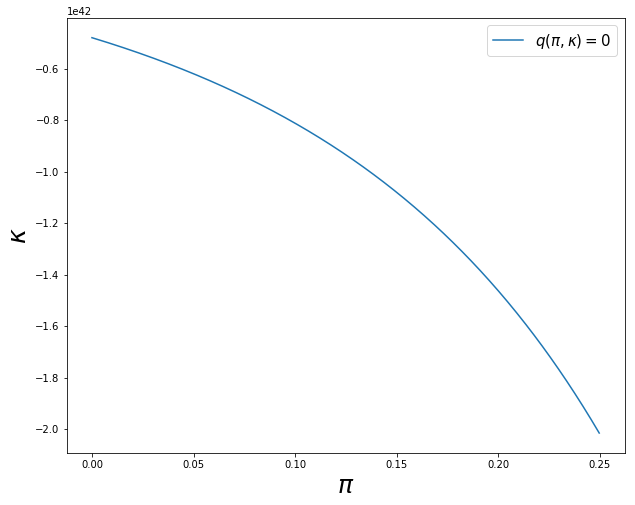

In [214]:
plt.figure(figsize=(10, 8))
plt.plot(p_lvl3[0:500], k_lvl3[0:500], label=r"$q(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

## Segunda curva de nivel:
---
Repetimos el procedimiento, ahora para la función:

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

Nuevamente, primero definimos la función dentro del término integral `pi_level_integ()`

In [215]:
def pi_level_integ(xx, y, kapp_par):#, param_dict):
    num = xx*dens_func(xx, y, all_params)#, param_dict)
    den = np.float_power(1-(kapp_par*xx), all_params["eta"])
    return num/den

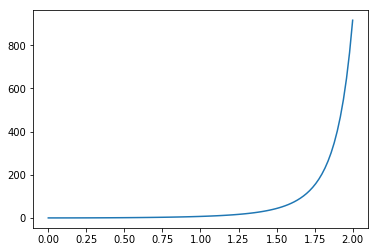

In [216]:
# Visualizacion funcion

x = np.linspace(0, 2, 100)
y = pi_level_integ(x, 0, 0.4)
plt.plot(x, y)
plt.show()

Ahora, calculamos la curva de nivel definiendo `pi_level()` como 

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

iterando valores de kappa según la restricción $\kappa \in [0, 1/c)$

In [217]:
def pi_level(param_dict):
    
    k_it  = np.linspace(0.0, 1./param_dict["c"], 1000)
    pi_it = []
    
    coef = param_dict["lamb"]/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    num2 = param_dict["c"]*(1.-dist_func(param_dict["c"], y, param_dict))
    ter4 = param_dict["p"]/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    for i in range(1000):
        #cor1 = NEW_RK4(pi_level_integ, 0, 1./param_dict["c"], 1000, k_it[i], 1.0, param_dict)
        cor1 = RK4(pi_level_integ, 0, 1./param_dict["c"], 1000, 5.0, k_it[i])
        cor2 = num2/(np.float_power(1-(k_it[i]*param_dict["c"]), param_dict["eta"]))
        ter3 = (param_dict["beta"]*k_it[i])/(param_dict["rho"]*param_dict["sig"])
        
        sol = coef*(cor1+cor2)+ter3-ter4
        pi_it.append(sol)
    
    pi_it = np.array(pi_it)
        
    return k_it, pi_it

In [218]:
kl, pil = pi_level(all_params)

Diferencia f(x+dx) - f(x):  0.0001325979724138837
Diferencia f(x+dx) - f(x):  0.0001326274239439318
Diferencia f(x+dx) - f(x):  0.00013265688222055538
Diferencia f(x+dx) - f(x):  0.0001326863472452533
Diferencia f(x+dx) - f(x):  0.00013271581901974638
Diferencia f(x+dx) - f(x):  0.00013274529754583875
Diferencia f(x+dx) - f(x):  0.00013277478282500144
Diferencia f(x+dx) - f(x):  0.00013280427485906632
Diferencia f(x+dx) - f(x):  0.00013283377364957383
Diferencia f(x+dx) - f(x):  0.0001328632791982448
Diferencia f(x+dx) - f(x):  0.00013289279150685562
Diferencia f(x+dx) - f(x):  0.0001329223105768912
Diferencia f(x+dx) - f(x):  0.00013295183641012787
Diferencia f(x+dx) - f(x):  0.00013298136900830038
Diferencia f(x+dx) - f(x):  0.00013301090837294915
Diferencia f(x+dx) - f(x):  0.00013304045450585056
Diferencia f(x+dx) - f(x):  0.00013307000740864217
Diferencia f(x+dx) - f(x):  0.0001330995670829338
Diferencia f(x+dx) - f(x):  0.00013312913353052958
Diferencia f(x+dx) - f(x):  0.0001331

Diferencia f(x+dx) - f(x):  0.00013754999522931632
Diferencia f(x+dx) - f(x):  0.00013758058284506214
Diferencia f(x+dx) - f(x):  0.00013761117748888052
Diferencia f(x+dx) - f(x):  0.00013764177916257558
Diferencia f(x+dx) - f(x):  0.00013767238786770164
Diferencia f(x+dx) - f(x):  0.00013770300360614607
Diferencia f(x+dx) - f(x):  0.00013773362637971298
Diferencia f(x+dx) - f(x):  0.0001377642561899567
Diferencia f(x+dx) - f(x):  0.00013779489303879233
Diferencia f(x+dx) - f(x):  0.00013782553692787136
Diferencia f(x+dx) - f(x):  0.00013785618785897014
Diferencia f(x+dx) - f(x):  0.00013788684583390665
Diferencia f(x+dx) - f(x):  0.00013791751085429071
Diferencia f(x+dx) - f(x):  0.00013794818292194033
Diferencia f(x+dx) - f(x):  0.00013797886203870124
Diferencia f(x+dx) - f(x):  0.0001380095482061694
Diferencia f(x+dx) - f(x):  0.0001380402414261489
Diferencia f(x+dx) - f(x):  0.0001380709417004855
Diferencia f(x+dx) - f(x):  0.00013810164903076128
Diferencia f(x+dx) - f(x):  0.00013

Diferencia f(x+dx) - f(x):  0.00014269333843236476
Diferencia f(x+dx) - f(x):  0.00014272510963911356
Diferencia f(x+dx) - f(x):  0.0001427568881683522
Diferencia f(x+dx) - f(x):  0.00014278867402185702
Diferencia f(x+dx) - f(x):  0.0001428204672015848
Diferencia f(x+dx) - f(x):  0.00014285226770918702
Diferencia f(x+dx) - f(x):  0.00014288407554657878
Diferencia f(x+dx) - f(x):  0.0001429158907156891
Diferencia f(x+dx) - f(x):  0.00014294771321812783
Diferencia f(x+dx) - f(x):  0.0001429795430558517
Diferencia f(x+dx) - f(x):  0.00014301138023077586
Diferencia f(x+dx) - f(x):  0.00014304322474451014
Diferencia f(x+dx) - f(x):  0.00014307507659909457
Diferencia f(x+dx) - f(x):  0.00014310693579623612
Diferencia f(x+dx) - f(x):  0.00014313880233775278
Diferencia f(x+dx) - f(x):  0.00014317067622557356
Diferencia f(x+dx) - f(x):  0.0001432025574614748
Diferencia f(x+dx) - f(x):  0.0001432344460472329
Diferencia f(x+dx) - f(x):  0.00014326634198484622
Diferencia f(x+dx) - f(x):  0.0001432

Diferencia f(x+dx) - f(x):  0.00014806902177692816
Diferencia f(x+dx) - f(x):  0.00014810203388554433
Diferencia f(x+dx) - f(x):  0.0001481350536264997
Diferencia f(x+dx) - f(x):  0.00014816808100166778
Diferencia f(x+dx) - f(x):  0.0001482011160130331
Diferencia f(x+dx) - f(x):  0.00014823415866246914
Diferencia f(x+dx) - f(x):  0.0001482672089518633
Diferencia f(x+dx) - f(x):  0.00014830026688321396
Diferencia f(x+dx) - f(x):  0.00014833333245828362
Diferencia f(x+dx) - f(x):  0.00014836640567907067
Diferencia f(x+dx) - f(x):  0.0001483994865475874
Diferencia f(x+dx) - f(x):  0.00014843257506554075
Diferencia f(x+dx) - f(x):  0.0001484656712350263
Diferencia f(x+dx) - f(x):  0.00014849877505786202
Diferencia f(x+dx) - f(x):  0.00014853188653594918
Diferencia f(x+dx) - f(x):  0.0001485650056712584
Diferencia f(x+dx) - f(x):  0.00014859813246571874
Diferencia f(x+dx) - f(x):  0.0001486312669211759
Diferencia f(x+dx) - f(x):  0.00014866440903961442
Diferencia f(x+dx) - f(x):  0.00014869

Diferencia f(x+dx) - f(x):  0.00015351785930248218
Diferencia f(x+dx) - f(x):  0.0001535521331177403
Diferencia f(x+dx) - f(x):  0.000153586414881543
Diferencia f(x+dx) - f(x):  0.00015362070459594424
Diferencia f(x+dx) - f(x):  0.0001536550022629285
Diferencia f(x+dx) - f(x):  0.0001536893078844248
Diferencia f(x+dx) - f(x):  0.00015372362146257035
Diferencia f(x+dx) - f(x):  0.0001537579429991831
Diferencia f(x+dx) - f(x):  0.0001537922724963725
Diferencia f(x+dx) - f(x):  0.0001538266099561647
Diferencia f(x+dx) - f(x):  0.00015386095538041933
Diferencia f(x+dx) - f(x):  0.0001538953087713013
Diferencia f(x+dx) - f(x):  0.00015392967013072578
Diferencia f(x+dx) - f(x):  0.00015396403946067727
Diferencia f(x+dx) - f(x):  0.00015399841676322357
Diferencia f(x+dx) - f(x):  0.00015403280204033531
Diferencia f(x+dx) - f(x):  0.0001540671952940248
Diferencia f(x+dx) - f(x):  0.0001541015965262904
Diferencia f(x+dx) - f(x):  0.0001541360057390473
Diferencia f(x+dx) - f(x):  0.0001541704229

Diferencia f(x+dx) - f(x):  0.00015921086608498836
Diferencia f(x+dx) - f(x):  0.00015924646226223027
Diferencia f(x+dx) - f(x):  0.0001592820667206396
Diferencia f(x+dx) - f(x):  0.00015931767946242292
Diferencia f(x+dx) - f(x):  0.00015935330048963414
Diferencia f(x+dx) - f(x):  0.0001593889298043133
Diferencia f(x+dx) - f(x):  0.00015942456740865307
Diferencia f(x+dx) - f(x):  0.00015946021330467963
Diferencia f(x+dx) - f(x):  0.000159495867494433
Diferencia f(x+dx) - f(x):  0.0001595315299801614
Diferencia f(x+dx) - f(x):  0.00015956720076376607
Diferencia f(x+dx) - f(x):  0.00015960287984745358
Diferencia f(x+dx) - f(x):  0.0001596385672333056
Diferencia f(x+dx) - f(x):  0.00015967426292336218
Diferencia f(x+dx) - f(x):  0.00015970996691978823
Diferencia f(x+dx) - f(x):  0.00015974567922463767
Diferencia f(x+dx) - f(x):  0.00015978139983996442
Diferencia f(x+dx) - f(x):  0.00015981712876798893
Diferencia f(x+dx) - f(x):  0.00015985286601070958
Diferencia f(x+dx) - f(x):  0.0001598

Diferencia f(x+dx) - f(x):  0.00016534584917844708
Diferencia f(x+dx) - f(x):  0.00016538287497823434
Diferencia f(x+dx) - f(x):  0.00016541990942027518
Diferencia f(x+dx) - f(x):  0.00016545695250685943
Diferencia f(x+dx) - f(x):  0.00016549400424009653
Diferencia f(x+dx) - f(x):  0.00016553106462216527
Diferencia f(x+dx) - f(x):  0.00016556813365534162
Diferencia f(x+dx) - f(x):  0.00016560521134174888
Diferencia f(x+dx) - f(x):  0.0001656422976836075
Diferencia f(x+dx) - f(x):  0.00016567939268299914


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


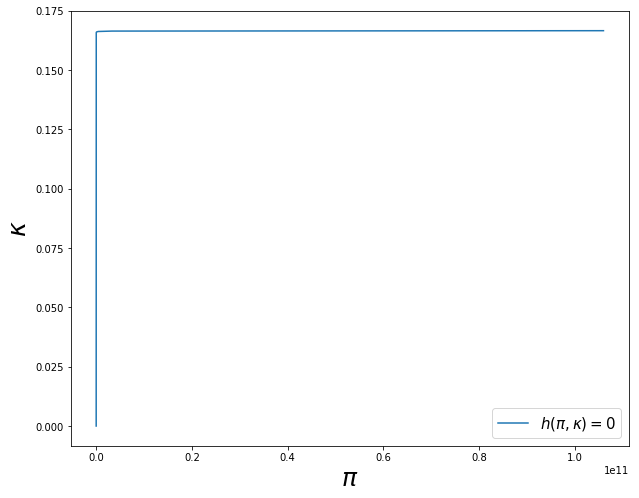

In [219]:
plt.figure(figsize=(10,8))
plt.plot(pil, kl, label=r"$h(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("h0.pdf", bbox_inches="tight")
plt.show()

# Gráficas conjuntas

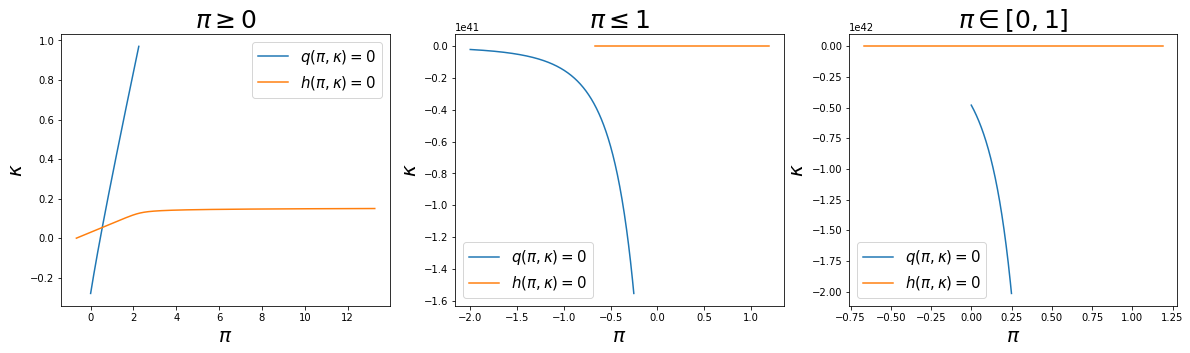

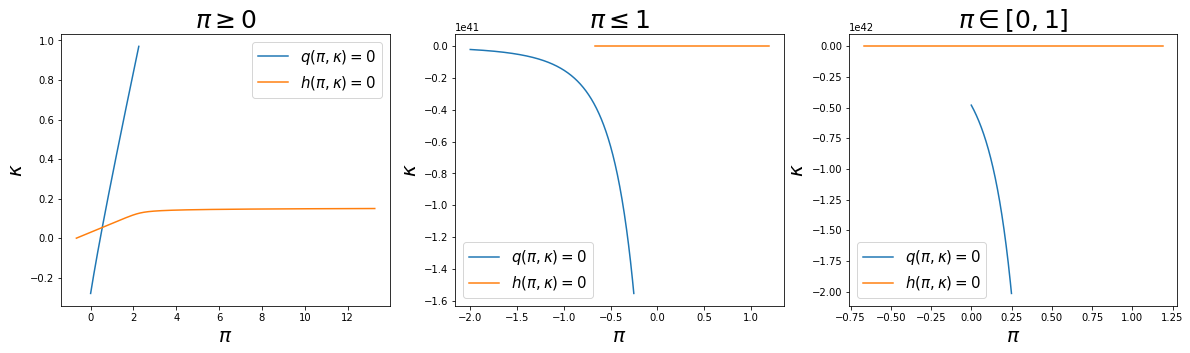

In [245]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(p_lvl1[0:900], k_lvl1[0:900], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[0:900], kl[0:900], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \geq 0$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(132)
plt.plot(p_lvl2[0:500], k_lvl2[0:500], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[0:500], kl[0:500], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \leq 1$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(133)
plt.plot(p_lvl3[0:500], k_lvl3[0:500], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[0:500], kl[0:500], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \in [0, 1]$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

#plt.savefig("all.pdf", bbox_inches="tight")
plt.show()